# Customer analysis in marketing campaigns

In this exercise, you work for a consulting firm as data scientist. In this scenario, your client is the marketing team of a grocery store. They would like to find which are the ideal customers according to the results of the last marketing campaigns. Your analysis will be helpful to adapt and modify products according to the different needs and behavior of their customers.

You dispose of a dataset from the mall dataset with several features:


People

- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if customer complained in the last 2 years, 0 otherwise

Products

- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

Promotion

- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

Place

- NumWebPurchases: Number of purchases made through the company’s web site
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s web site in the last month

'Z_CostContact' and 'Z_Revenue' contains constant value across all the observations and therefore they will not contribute anything in the analysis.

Use the recent know datetime in the dataset to estimate the age of customers

You have two days to do this study

In [343]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [344]:
df = pd.read_csv('data/marketing_campaign.csv', sep="\t")
df = df.drop(columns = ['Z_CostContact','Z_Revenue',"ID"])
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,3,6,5,0,0,0,0,0,0,0


In [345]:
df.shape

(2240, 26)

# EDA

## NaN value

In [346]:
df.isna().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

## Duplicate value

In [347]:
df[df.duplicated()]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
83,1963,Master,Together,38620.0,0,0,11-05-2013,56,112,17,...,5,3,3,0,0,0,0,0,0,0
179,1951,2n Cycle,Married,78497.0,0,0,01-12-2013,44,207,26,...,7,12,2,0,0,0,1,0,0,0
281,1976,Graduation,Together,51369.0,0,1,25-10-2012,84,297,7,...,2,4,8,0,0,0,0,0,0,0
282,1946,Graduation,Together,37760.0,0,0,31-08-2012,20,84,5,...,1,6,7,0,0,0,0,0,0,0
363,1978,PhD,Married,37717.0,1,0,23-11-2012,31,9,0,...,0,2,9,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2218,1978,Graduation,Together,22775.0,1,0,19-06-2013,40,5,1,...,0,2,8,0,0,0,0,0,0,0
2221,1982,Master,Single,75777.0,0,0,04-07-2013,12,712,26,...,6,11,1,0,1,1,0,0,0,1
2225,1968,Graduation,Together,58554.0,1,1,26-09-2012,55,368,24,...,2,6,7,0,0,0,0,0,0,0
2234,1974,Graduation,Married,34421.0,1,0,01-07-2013,81,3,3,...,0,2,7,0,0,0,0,0,0,0


## Description des données

In [348]:
df.describe(include = "all")

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2240.000000,2240,2240,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
unique,NaN,5,8,NaN,NaN,NaN,663,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Graduation,Married,NaN,NaN,NaN,31-08-2012,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1127,864,NaN,NaN,NaN,12,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1968.805804,NaN,NaN,52247.251354,0.444196,0.506250,NaN,49.109375,303.935714,26.302232,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107
std,11.984069,NaN,NaN,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274
min,1893.000000,NaN,NaN,1730.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,NaN,NaN,35303.000000,0.000000,0.000000,NaN,24.000000,23.750000,1.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1970.000000,NaN,NaN,51381.500000,0.000000,0.000000,NaN,49.000000,173.500000,8.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1977.000000,NaN,NaN,68522.000000,1.000000,1.000000,NaN,74.000000,504.250000,33.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [349]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   i

## Distribution des données

In [350]:
df[list(df.iloc[:, 20:].columns)] = df[list(df.iloc[:, 20:].columns)].astype("object")
df[["Kidhome","Teenhome"]] =  df[["Kidhome","Teenhome"]].astype("object")

In [351]:
from datetime import datetime
from datetime import date

currentYear = datetime.now().year
df['Age'] = currentYear - df['Year_Birth']
df = df.drop("Year_Birth", axis = 1)

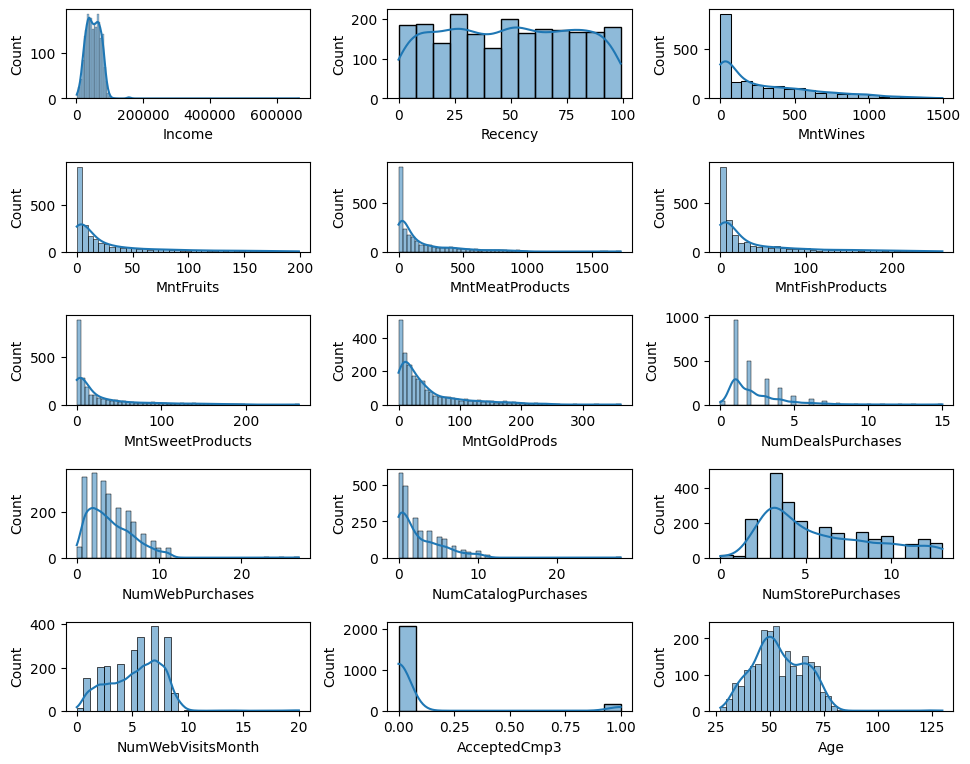

In [352]:
fig, axs = plt.subplots(5, 3, figsize=(10,8))
axs = axs.flatten()
fig.tight_layout(pad=2.5)
for i, col in enumerate(df.select_dtypes(include=['number']).columns):
    sns.histplot(x=df.select_dtypes(include=['number'])[col], ax=axs[i],kde = True)
plt.show()

## Outliers

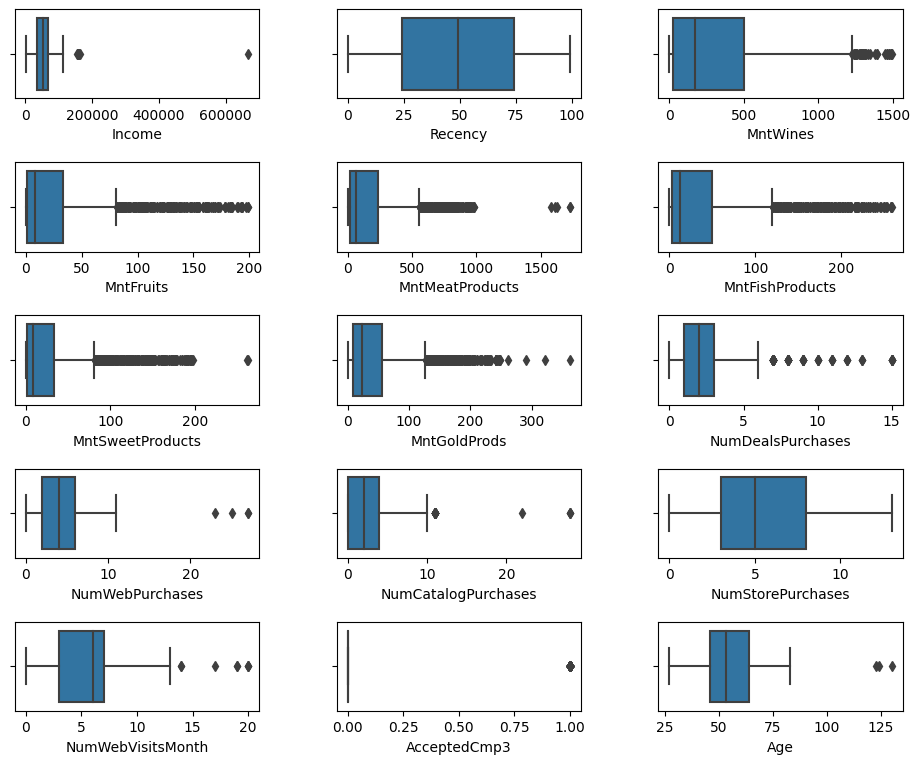

In [353]:
fig, axs = plt.subplots(5, 3, figsize=(10,8))
axs = axs.flatten()
fig.tight_layout(pad=2.5)
for i, col in enumerate(df.select_dtypes(include=['number']).columns):
    sns.boxplot(x=df.select_dtypes(include=['number'])[col], ax=axs[i])
plt.show()

# Customer Segmentation

## 1ère itération

In [354]:
df['Dt_Customer']= pd.to_datetime(df['Dt_Customer'])

In [355]:
# define the bins
bins = [1,2,3,4,5,6,7,8,9,10,11,12,13]

# add custom labels if desired
labels = ["1","2","3","4","5","6","7","8","9","10","11","12"]

# add the bins to the dataframe
df['Dt_Customer'] = pd.cut(df["Dt_Customer"].dt.month, bins, labels=labels, right=False)
df['Dt_Customer'] = df['Dt_Customer'].astype(int)

In [356]:
from sklearn.preprocessing import OneHotEncoder

def one(df):
    
    onehot = OneHotEncoder(handle_unknown='ignore',sparse = False, drop = "if_binary")
    X = df.select_dtypes("object")
    onehot.fit(X)
    encoded = onehot.transform(X)
    df_onehot = pd.DataFrame(encoded, columns = onehot.get_feature_names_out())
    df_encoded = pd.concat([df.drop(columns = list(X.columns)), df_onehot], axis = 1)
    return df_encoded

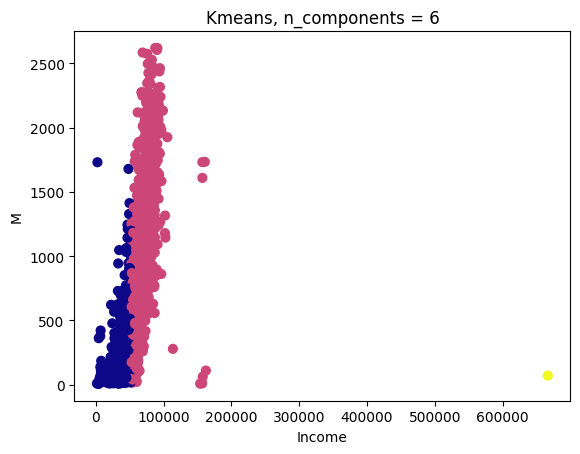

gmm: silhouttte:  0.6055919516301587


In [412]:
X = one(df).dropna()
X['M'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

# Initialize GMM
gmm = KMeans(n_clusters= 3, n_init="auto", random_state=10)

# Fit GMM
gmm.fit(X)

# Predict clusters
labels = gmm.predict(X)

# Plot clusters
plt.scatter(X.iloc[:, 0], X.iloc[:, 16], c=labels, s=40, cmap='plasma')
plt.xlabel(X.iloc[:, 0].name)
plt.ylabel(X.iloc[:, 16].name)
plt.title("Kmeans, n_components = 3")
plt.show()




print ("gmm: silhouttte: ", silhouette_score(X, labels)) 


In [506]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.

def evaluate(X, n) : 
    range_n_clusters = [i for i in range(2,n+1)]

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, ax1  = plt.subplots(1, 1)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])




    plt.show()

## 2ème itération / Outliers

For n_clusters = 2 The average silhouette_score is : 0.6180764030447872
For n_clusters = 3 The average silhouette_score is : 0.548934258945589
For n_clusters = 4 The average silhouette_score is : 0.5386759465612734
For n_clusters = 5 The average silhouette_score is : 0.5393915118768843


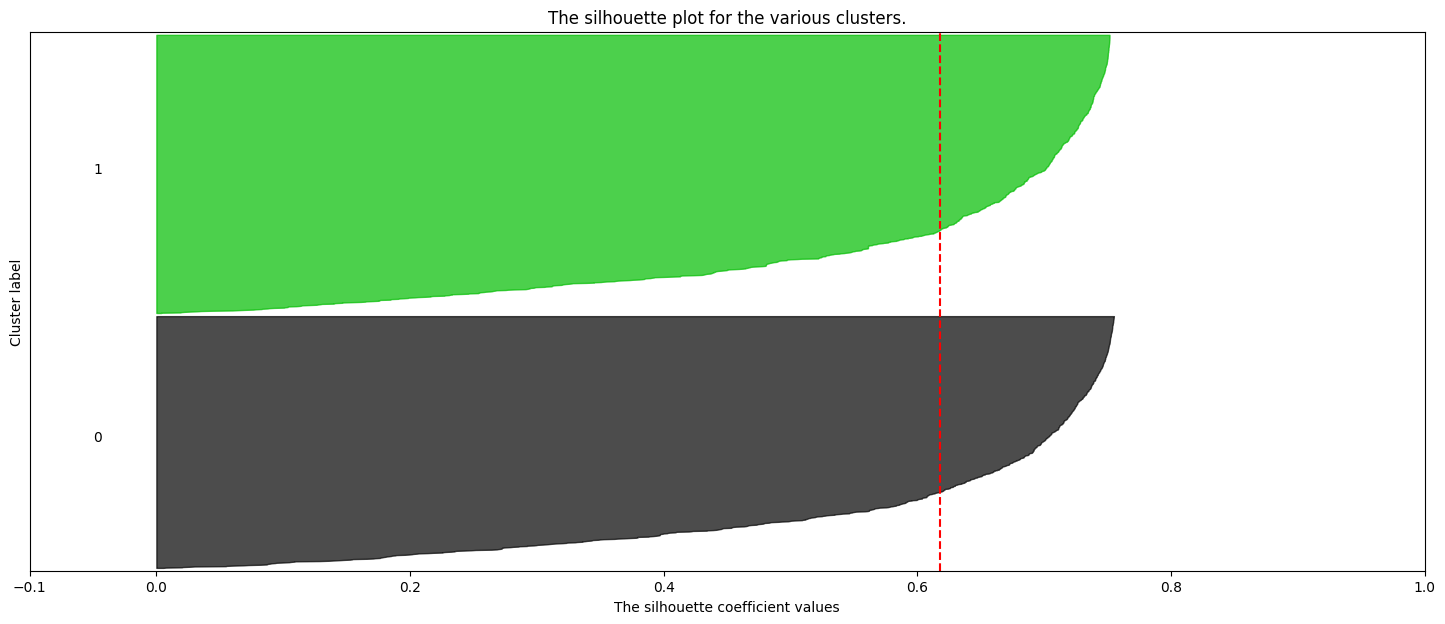

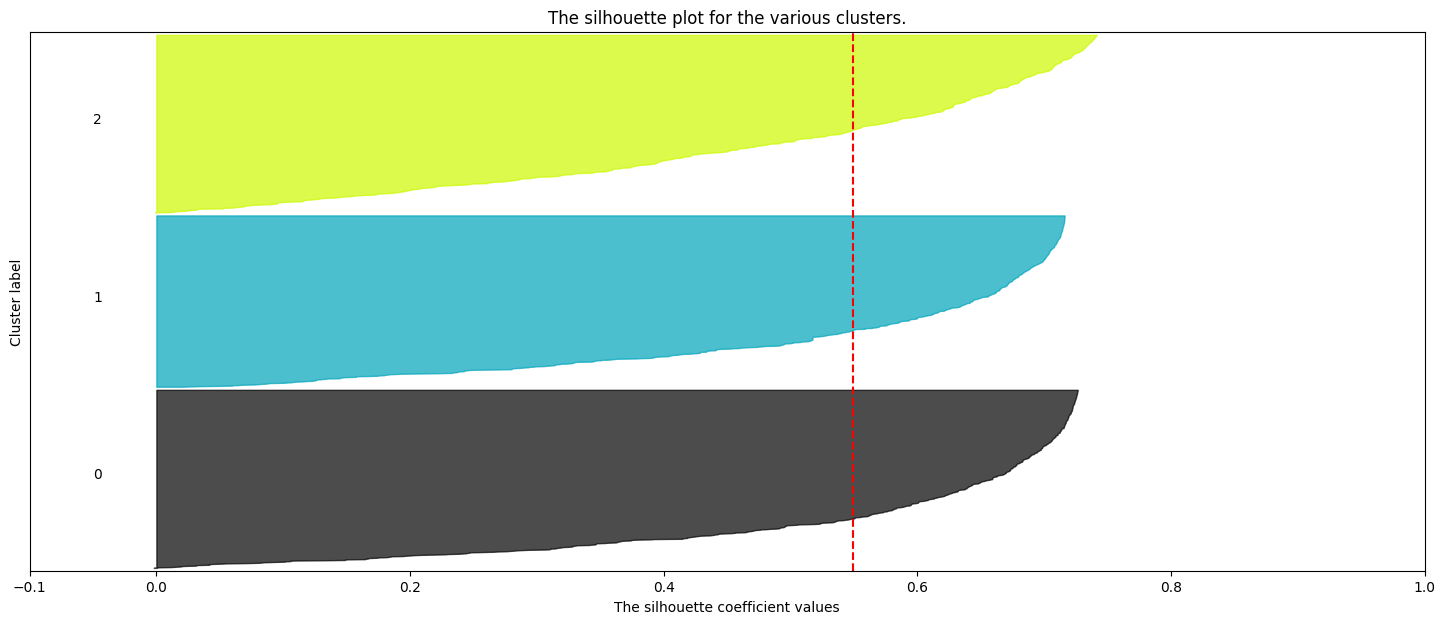

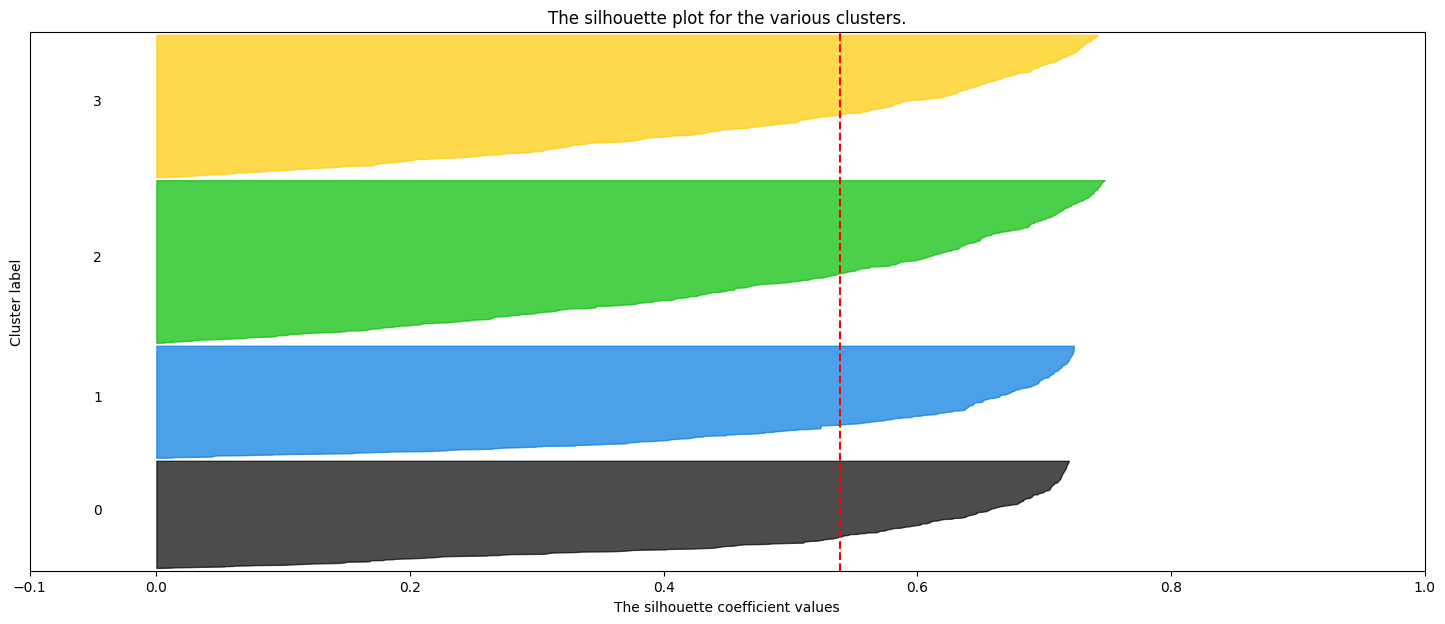

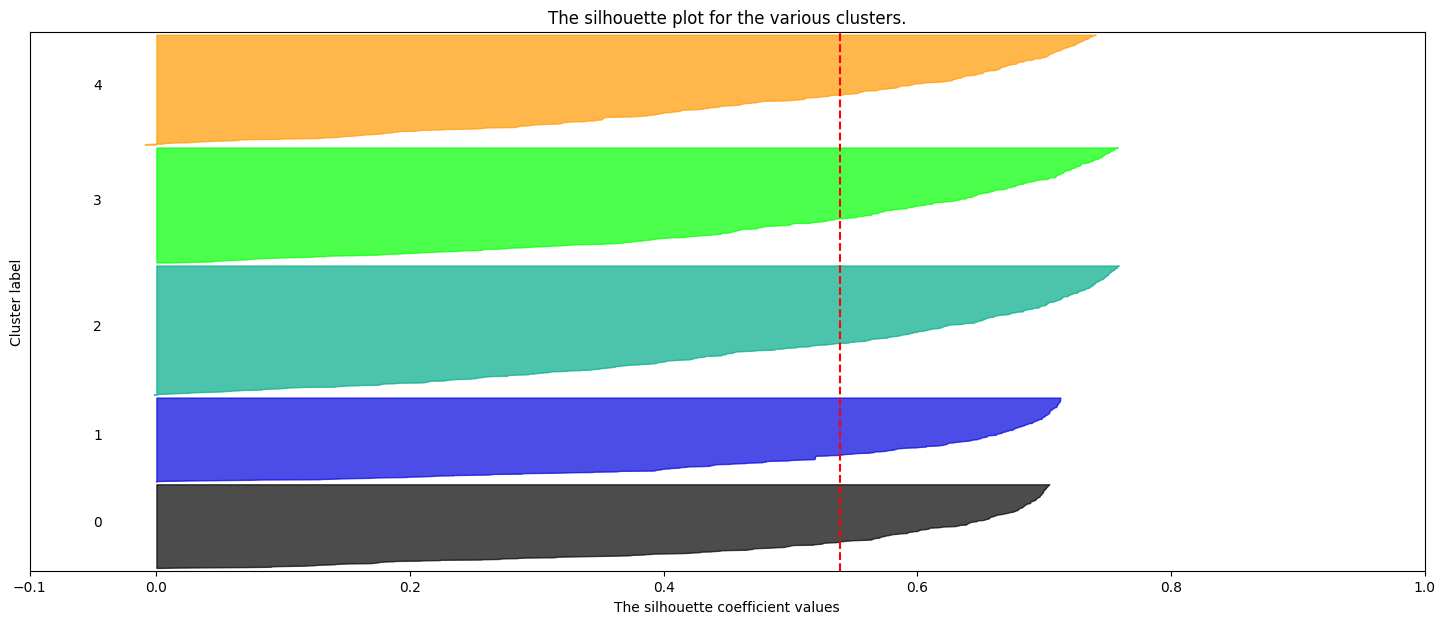

In [477]:
from scipy import stats


dff = one(df).dropna()
wo = dff[(np.abs(stats.zscore(dff)) < 4).all(axis=1)]
evaluate(wo, 5)

In [486]:
def model(X, n): 
    # Initialize GMM
    gmm = KMeans(n_clusters= n, n_init="auto", random_state=10)

    # Fit GMM
    gmm.fit(X)

    # Predict clusters
    labels = gmm.predict(X)

    # Plot clusters
    plt.scatter(X.iloc[:, 0], X.iloc[:, 16], c=labels, s=40, cmap='plasma')
    plt.xlabel(X.iloc[:, 0].name)
    plt.ylabel(X.iloc[:, 16].name)
    plt.title(f'Kmeans, n_components = {n}')
    plt.show()


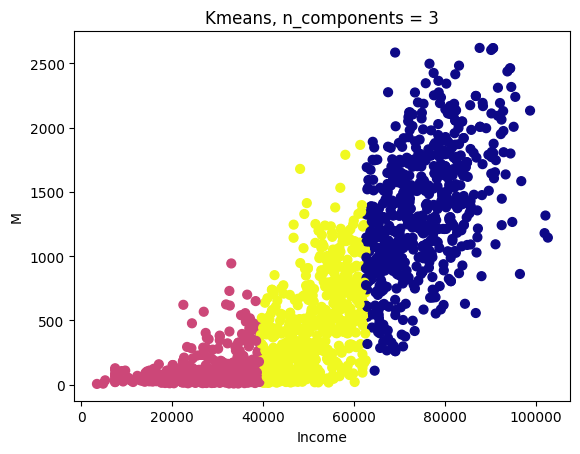

In [551]:
model(wo,3)

## 3ème itération / standardisation et normalisation

In [464]:
scaler = MinMaxScaler()
arr_scale = scaler.fit_transform(wo)
df_minmax = pd.DataFrame(arr_scale, columns = wo.columns)

For n_clusters = 2 The average silhouette_score is : 0.10382631578925891
For n_clusters = 3 The average silhouette_score is : 0.12081054794723846
For n_clusters = 4 The average silhouette_score is : 0.14203930149626878
For n_clusters = 5 The average silhouette_score is : 0.1347805328025156
For n_clusters = 6 The average silhouette_score is : 0.11153469060426575
For n_clusters = 7 The average silhouette_score is : 0.12199989878393297
For n_clusters = 8 The average silhouette_score is : 0.12051956942300265
For n_clusters = 9 The average silhouette_score is : 0.14322753877154534
For n_clusters = 10 The average silhouette_score is : 0.14880360573290793


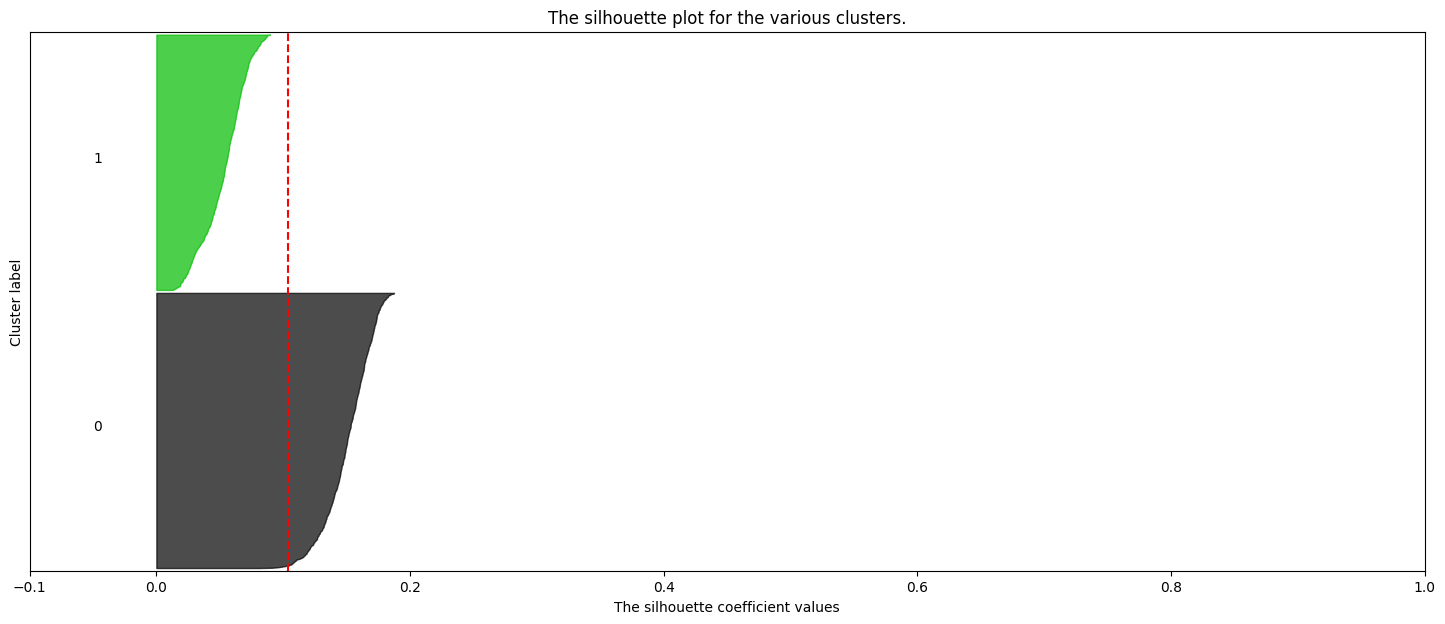

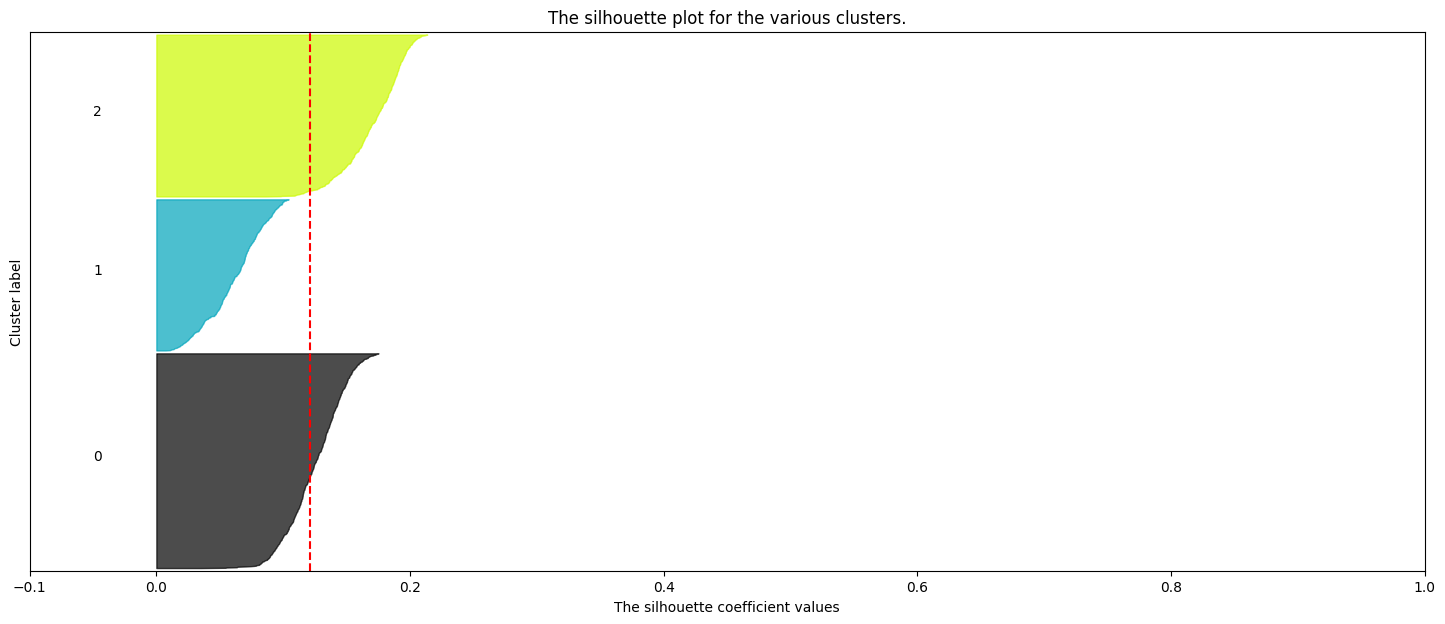

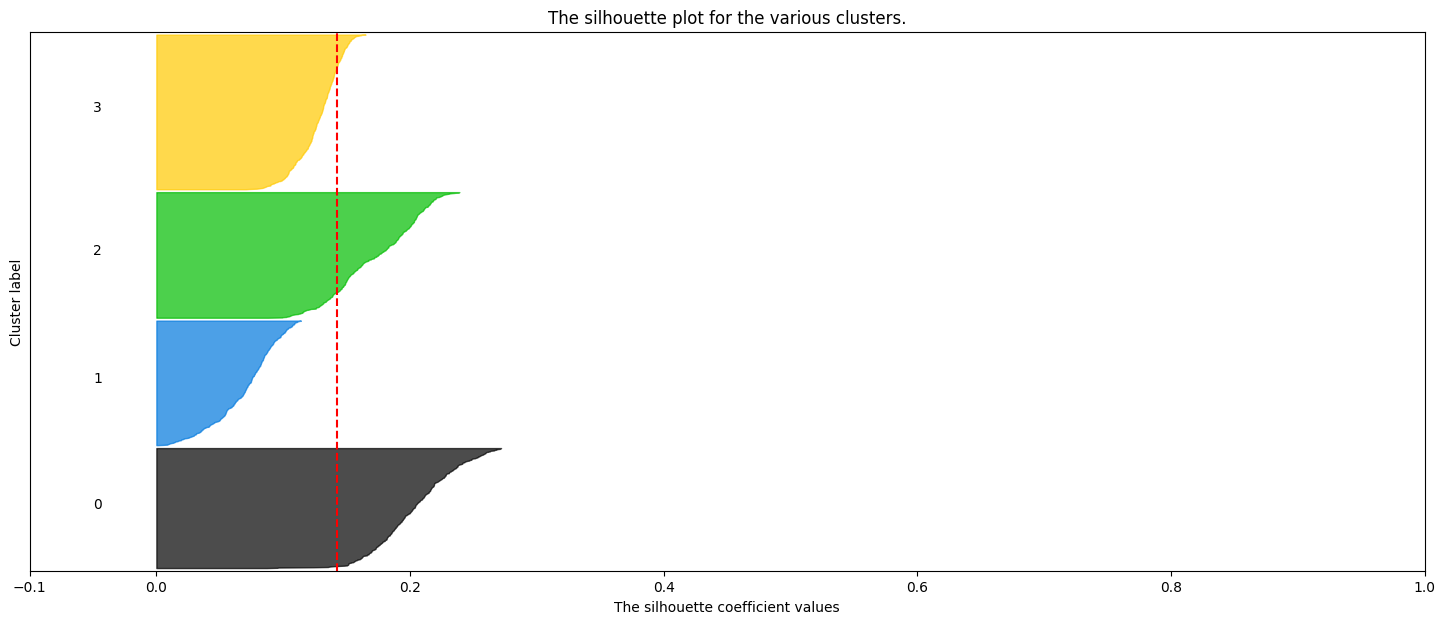

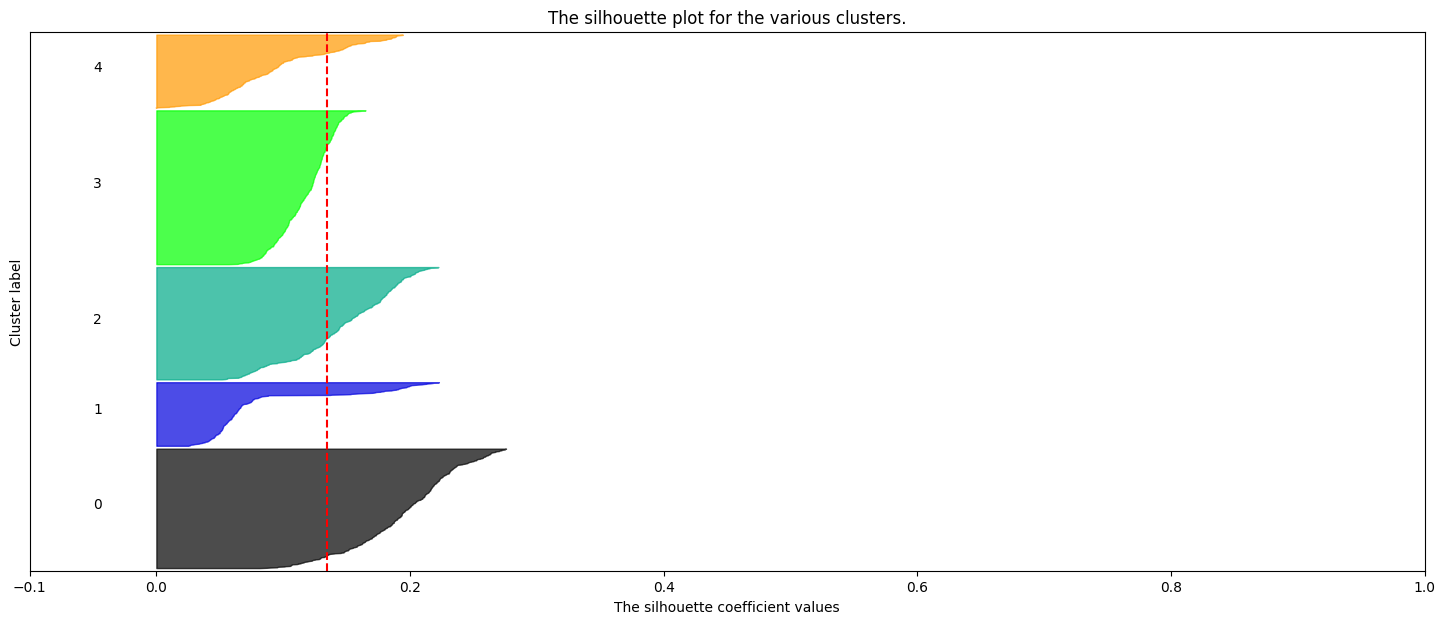

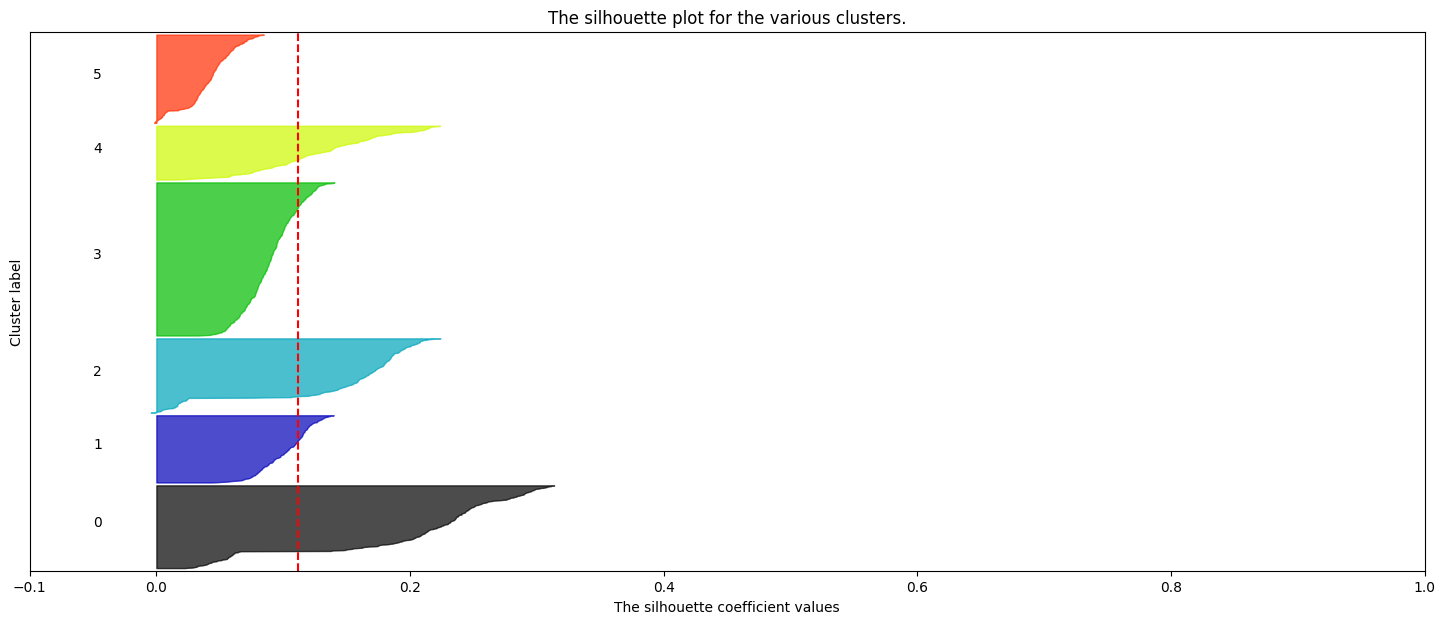

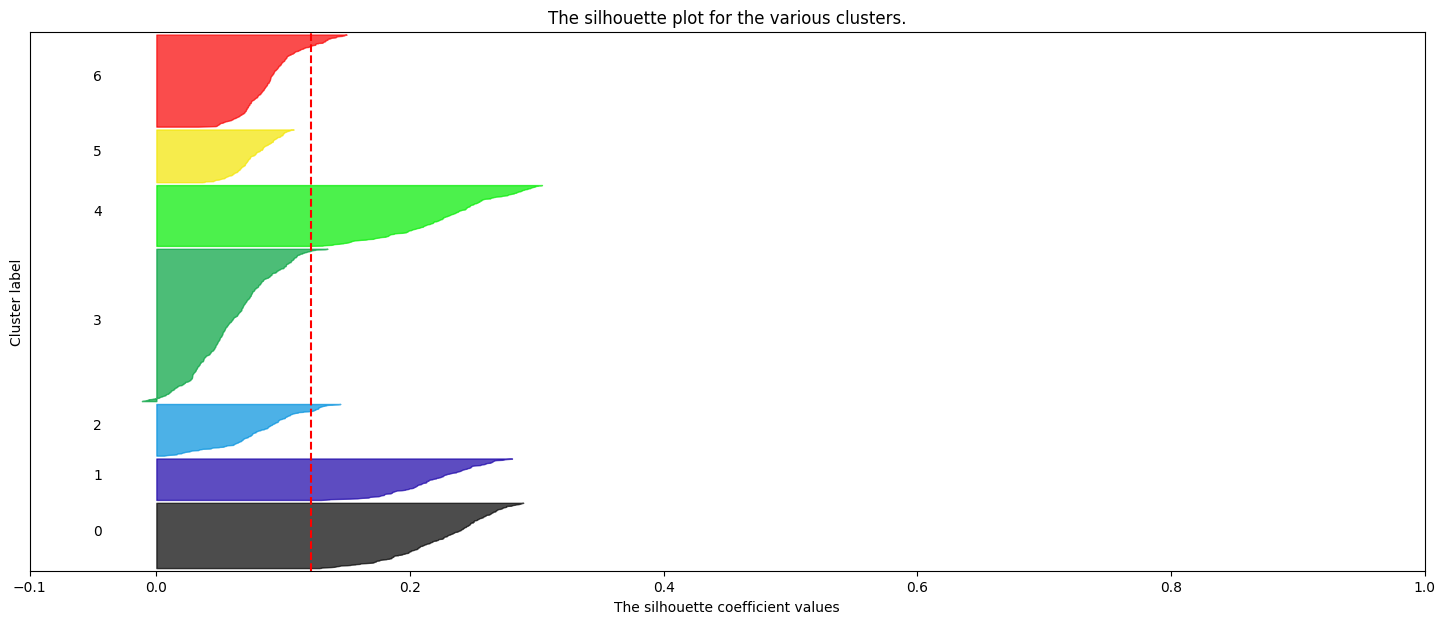

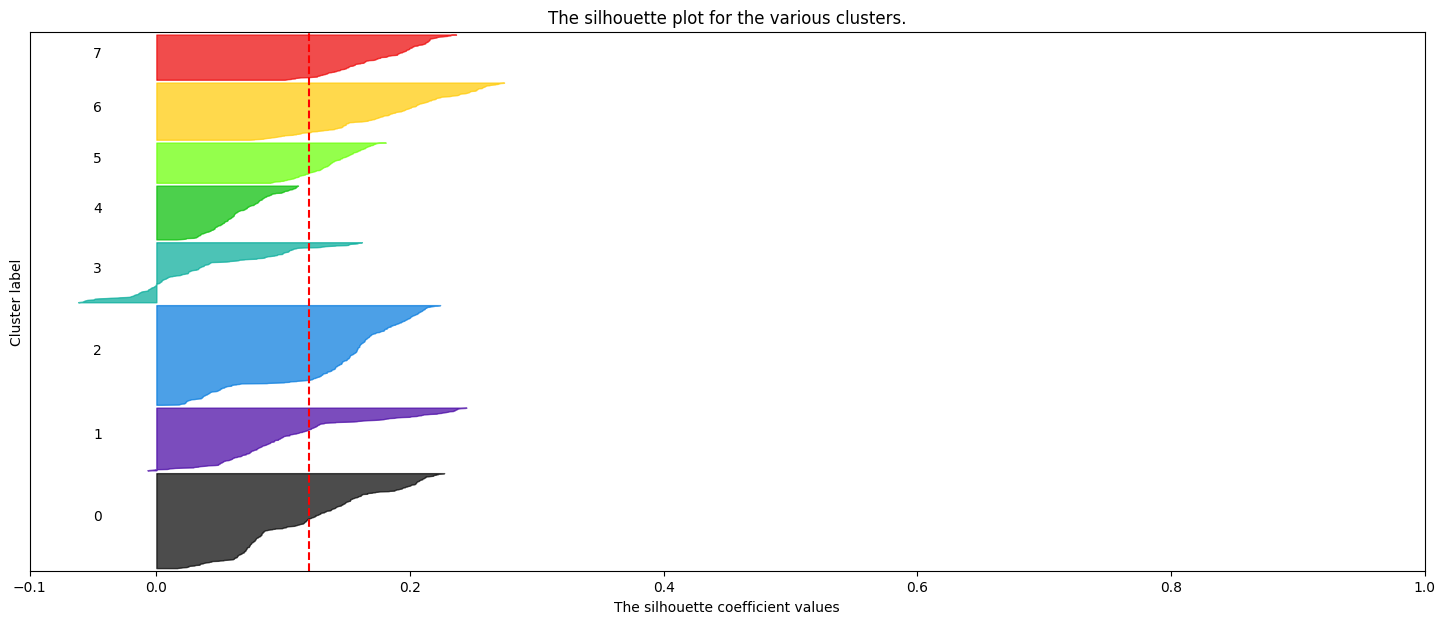

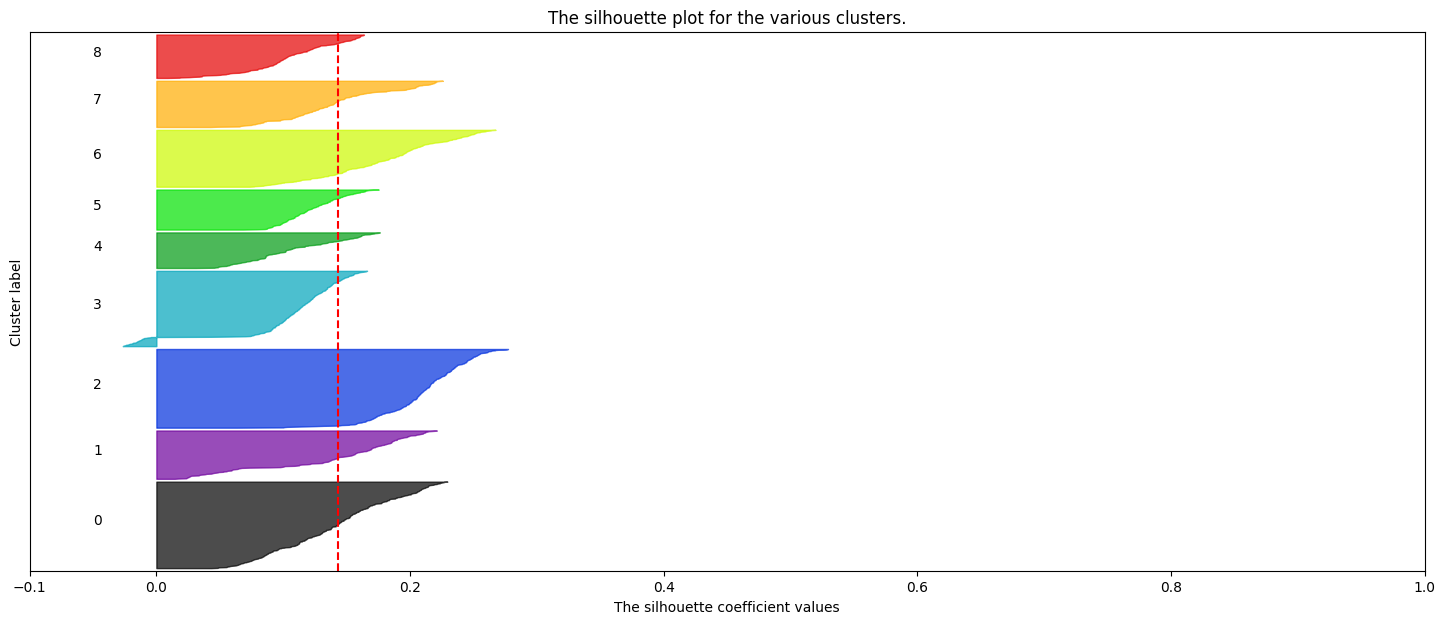

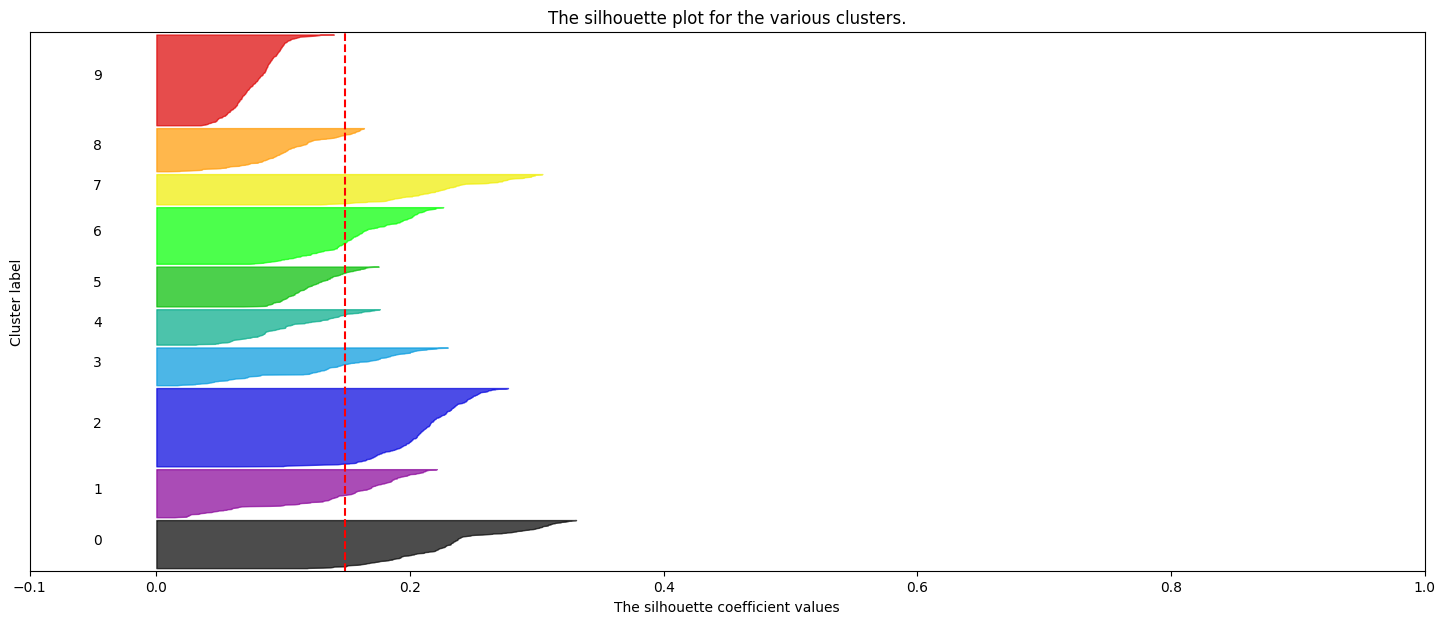

In [468]:
evaluate(df_minmax, 10)

In [465]:
scaler = StandardScaler()
arr_scale = scaler.fit_transform(wo)
df_stand = pd.DataFrame(arr_scale, columns = wo.columns)

For n_clusters = 2 The average silhouette_score is : 0.16956322805925775
For n_clusters = 3 The average silhouette_score is : 0.07632459825794244
For n_clusters = 4 The average silhouette_score is : 0.08193366286125836
For n_clusters = 5 The average silhouette_score is : 0.06436791222650784
For n_clusters = 6 The average silhouette_score is : 0.06350863497313876
For n_clusters = 7 The average silhouette_score is : 0.059447922114127014
For n_clusters = 8 The average silhouette_score is : 0.06488877095770144
For n_clusters = 9 The average silhouette_score is : 0.06537771734802725
For n_clusters = 10 The average silhouette_score is : 0.06435496088971632


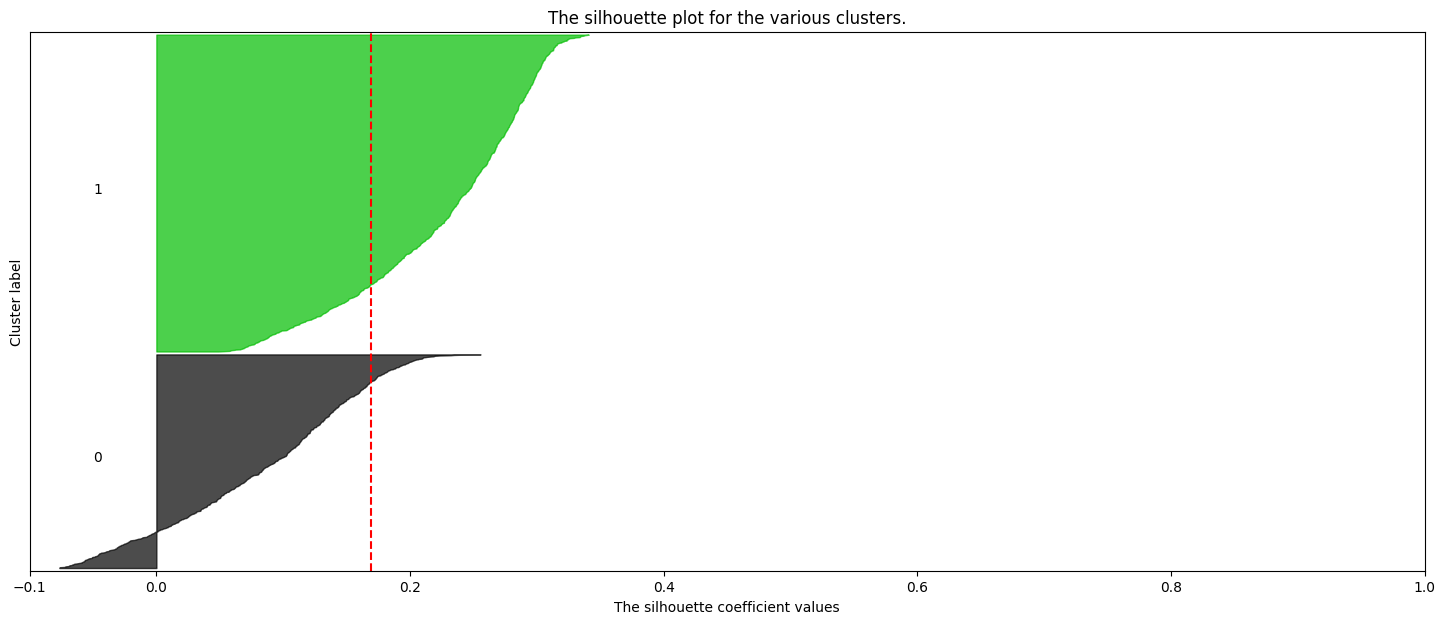

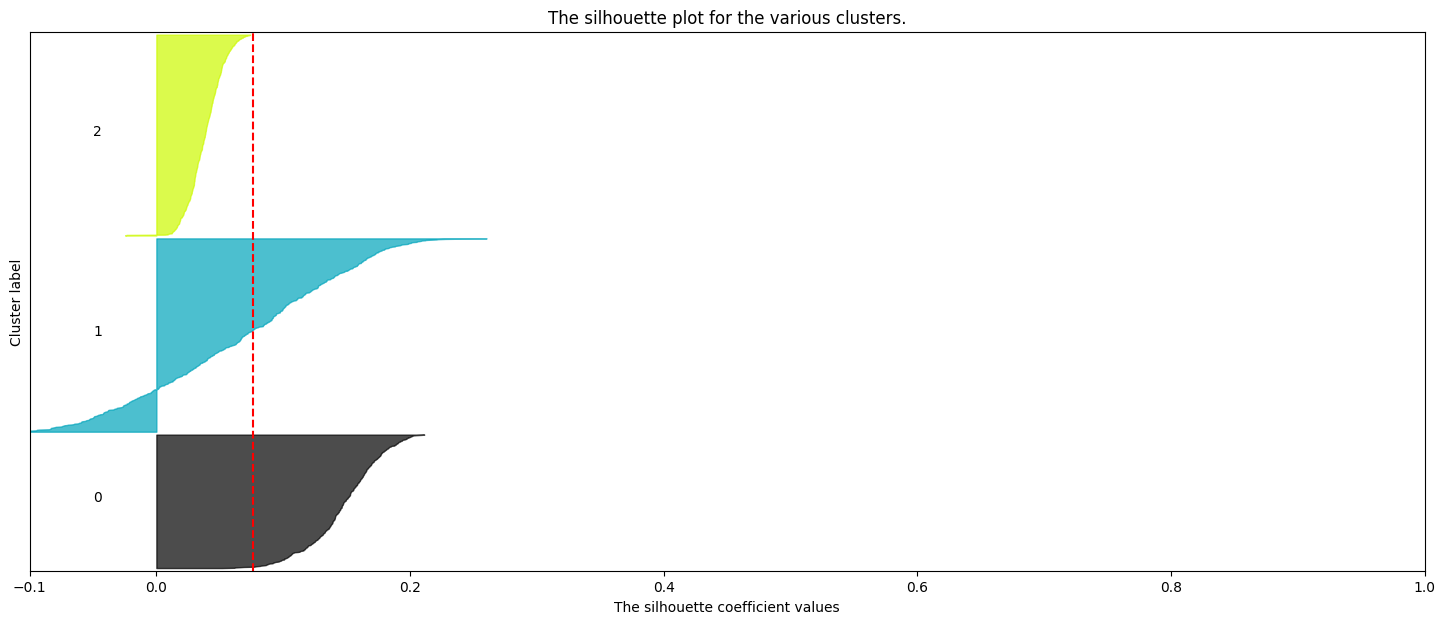

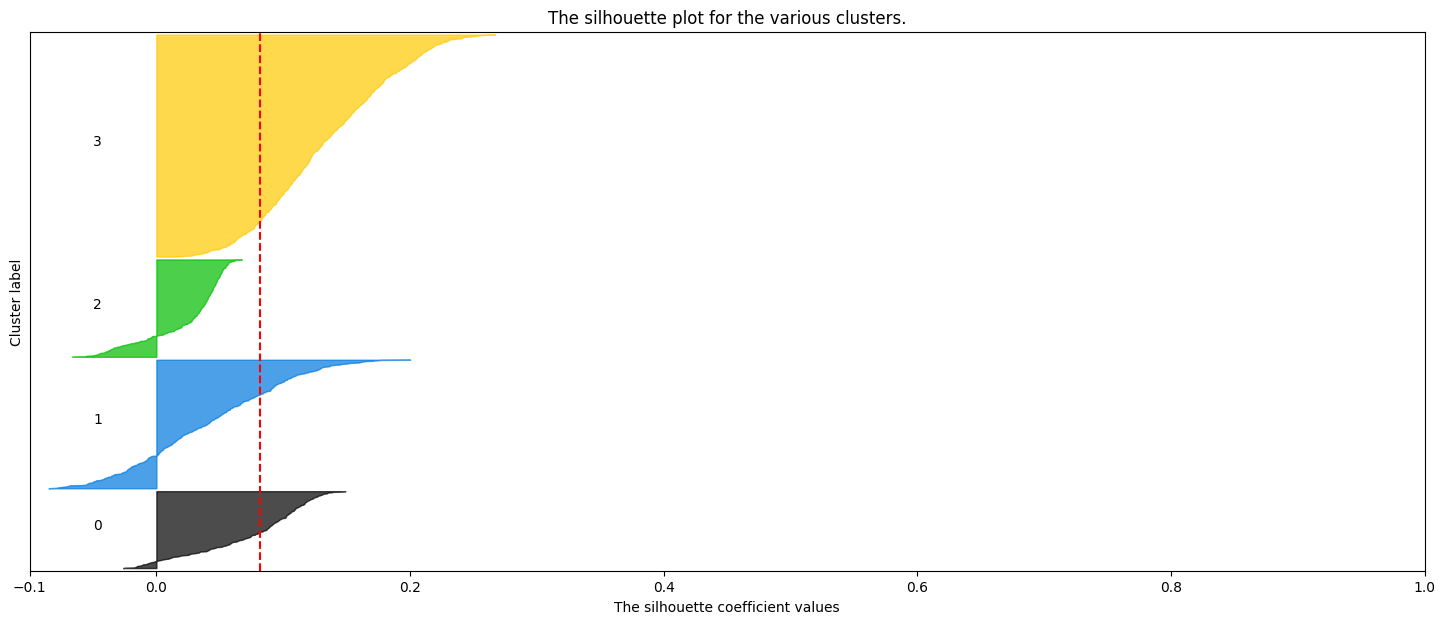

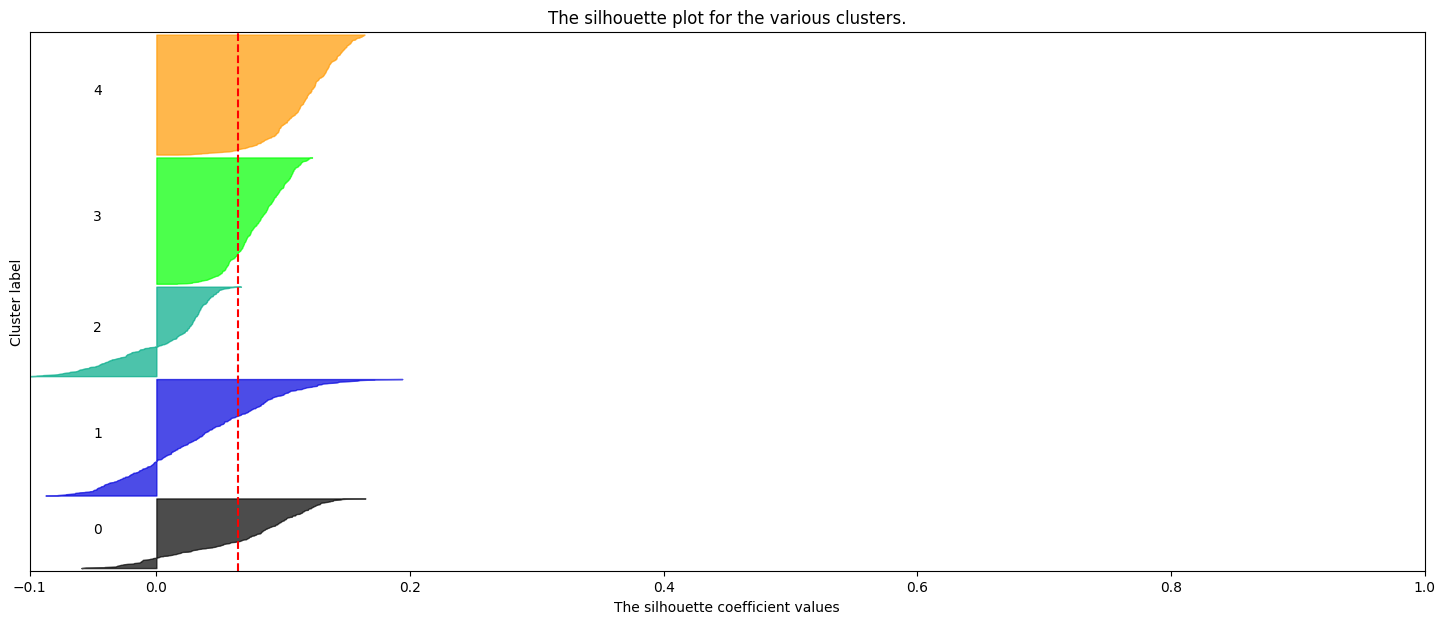

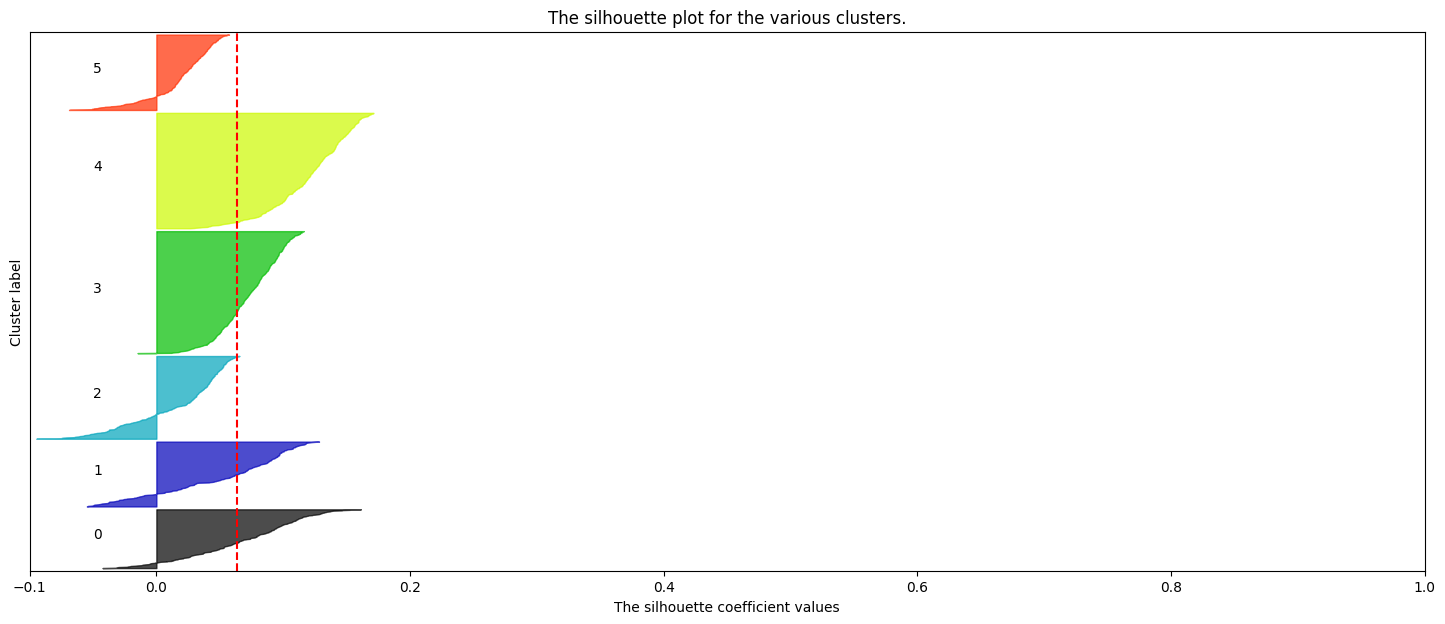

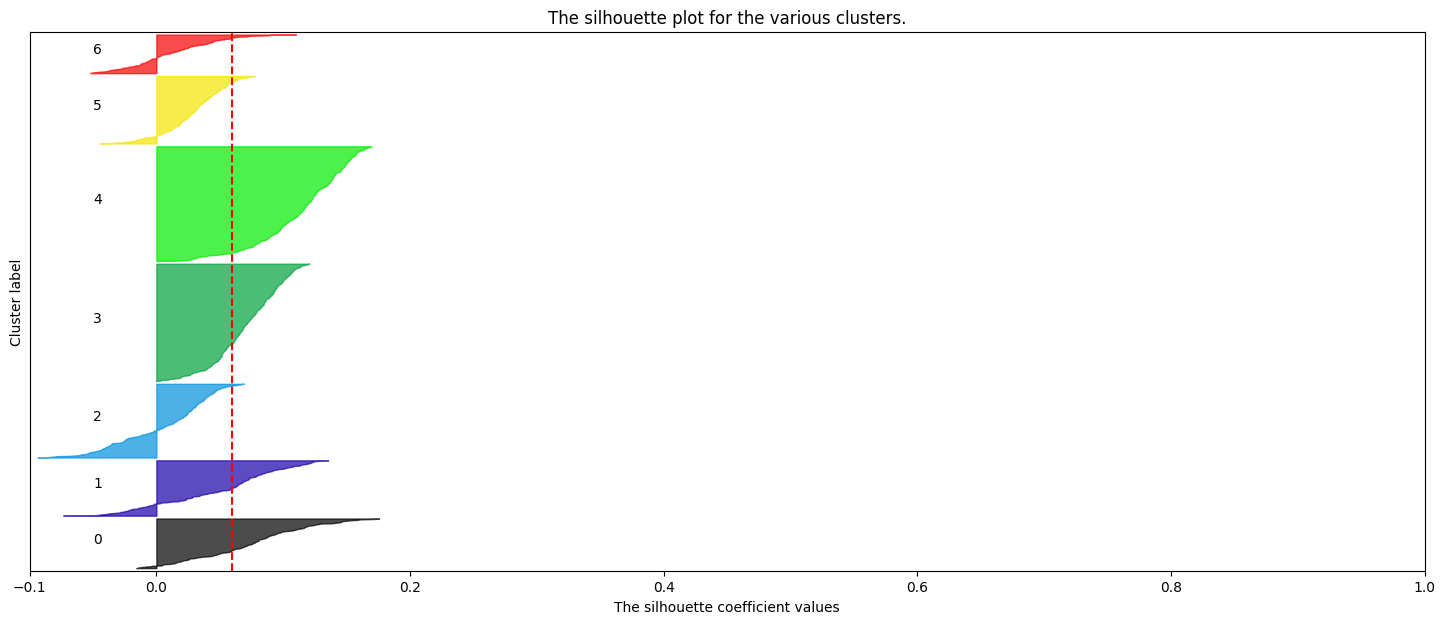

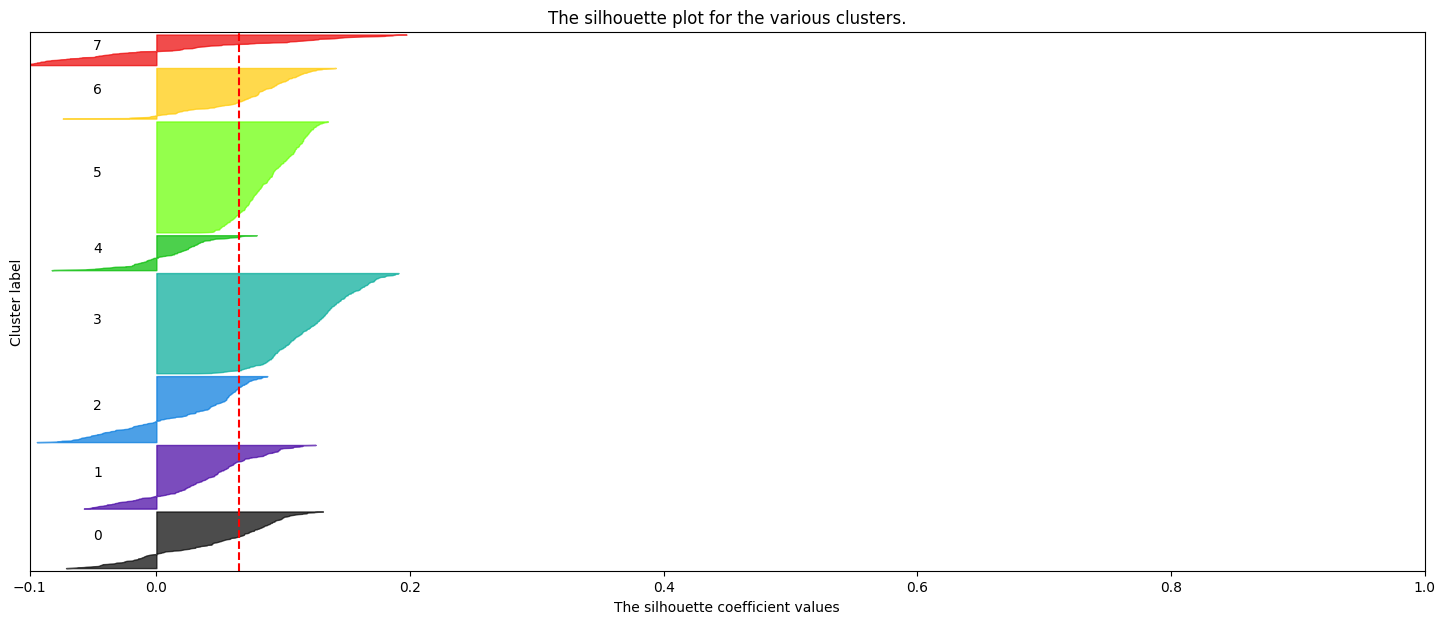

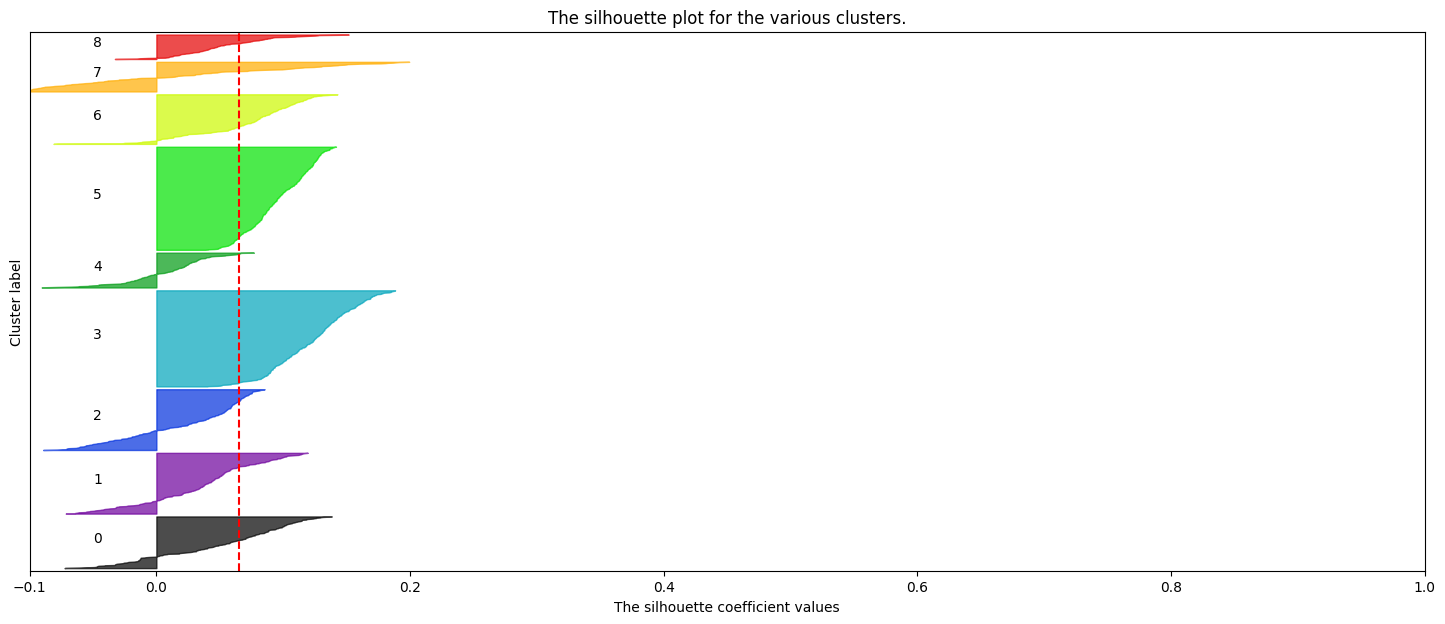

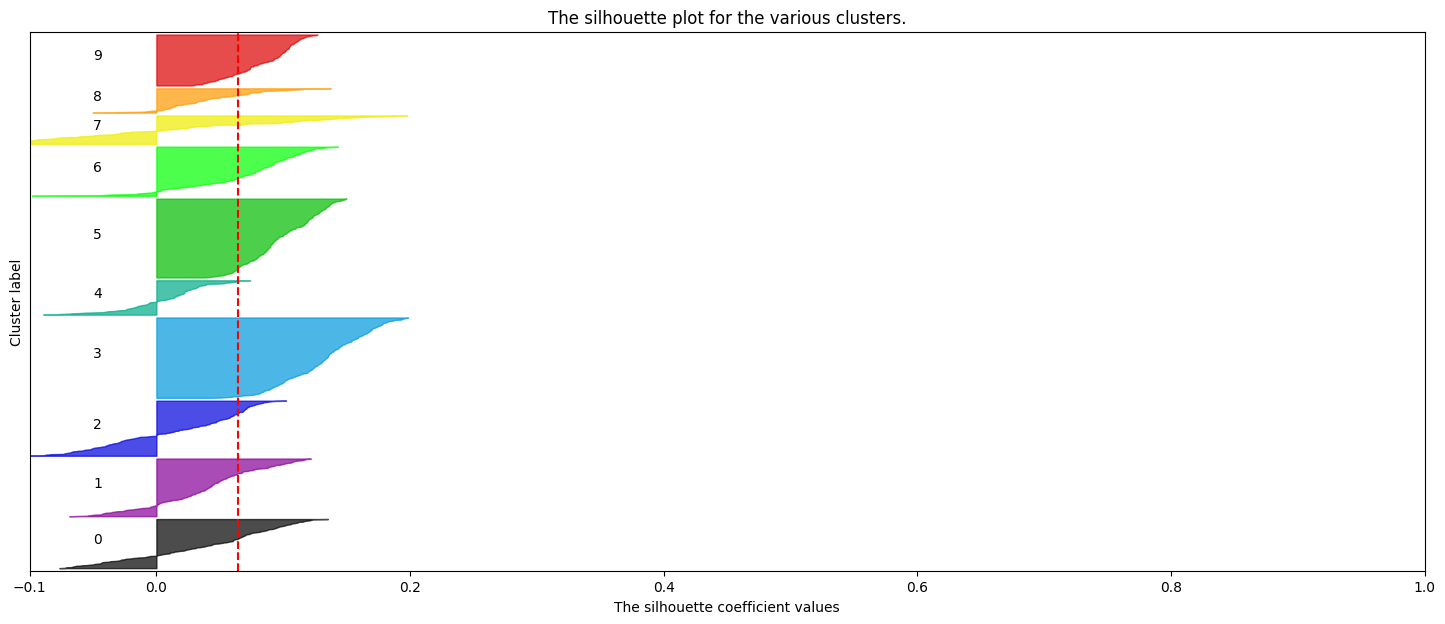

In [467]:
evaluate(df_stand, 10)

## 4ème itération / Spectral clustering

For n_clusters = 2 The average silhouette_score is : 0.5322813212544893
For n_clusters = 3 The average silhouette_score is : 0.5522551830654278
For n_clusters = 4 The average silhouette_score is : 0.5171100935528833
For n_clusters = 5 The average silhouette_score is : 0.4925475279592859
For n_clusters = 6 The average silhouette_score is : 0.522677426275196
For n_clusters = 7 The average silhouette_score is : 0.5025556628648448
For n_clusters = 8 The average silhouette_score is : 0.5002785689487548
For n_clusters = 9 The average silhouette_score is : 0.489755886893217
For n_clusters = 10 The average silhouette_score is : 0.4866486446280088


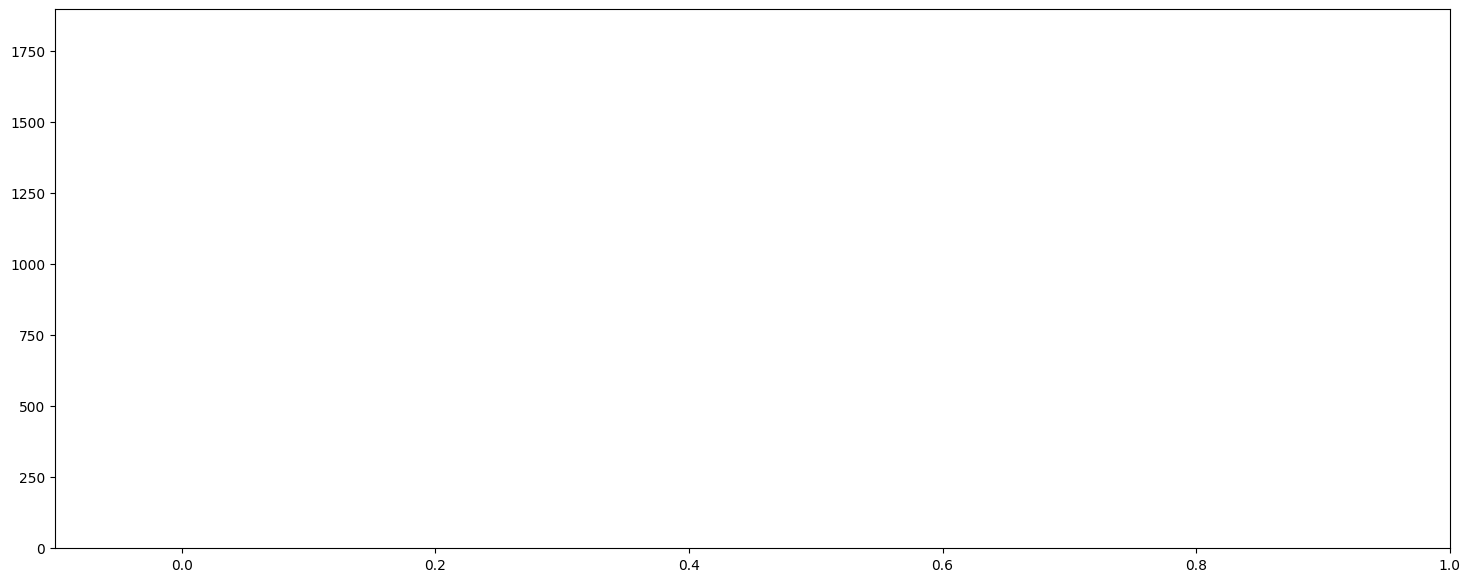

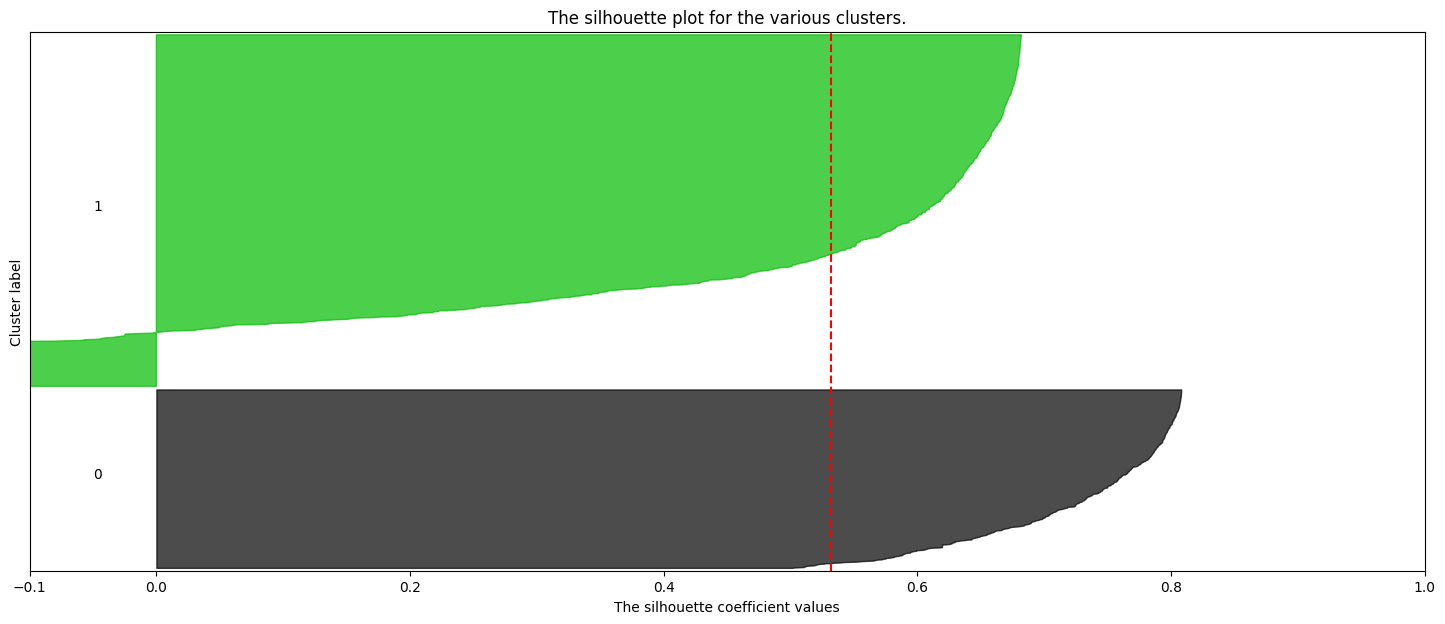

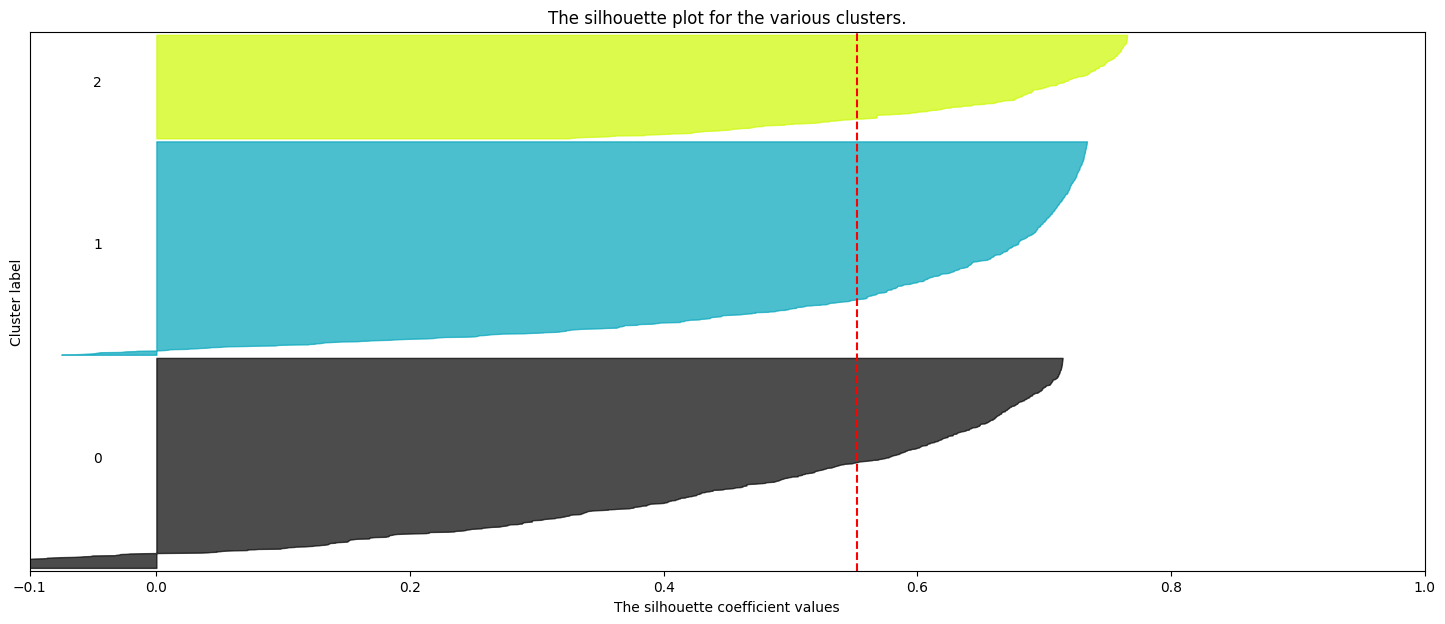

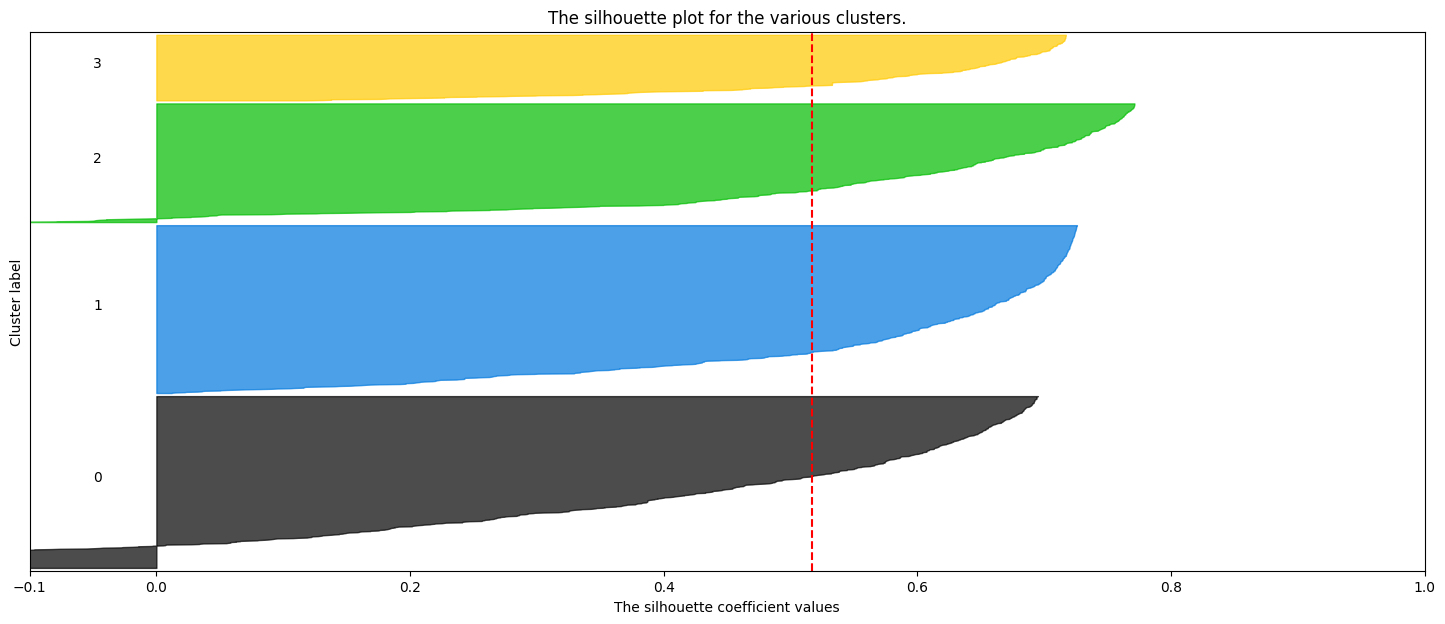

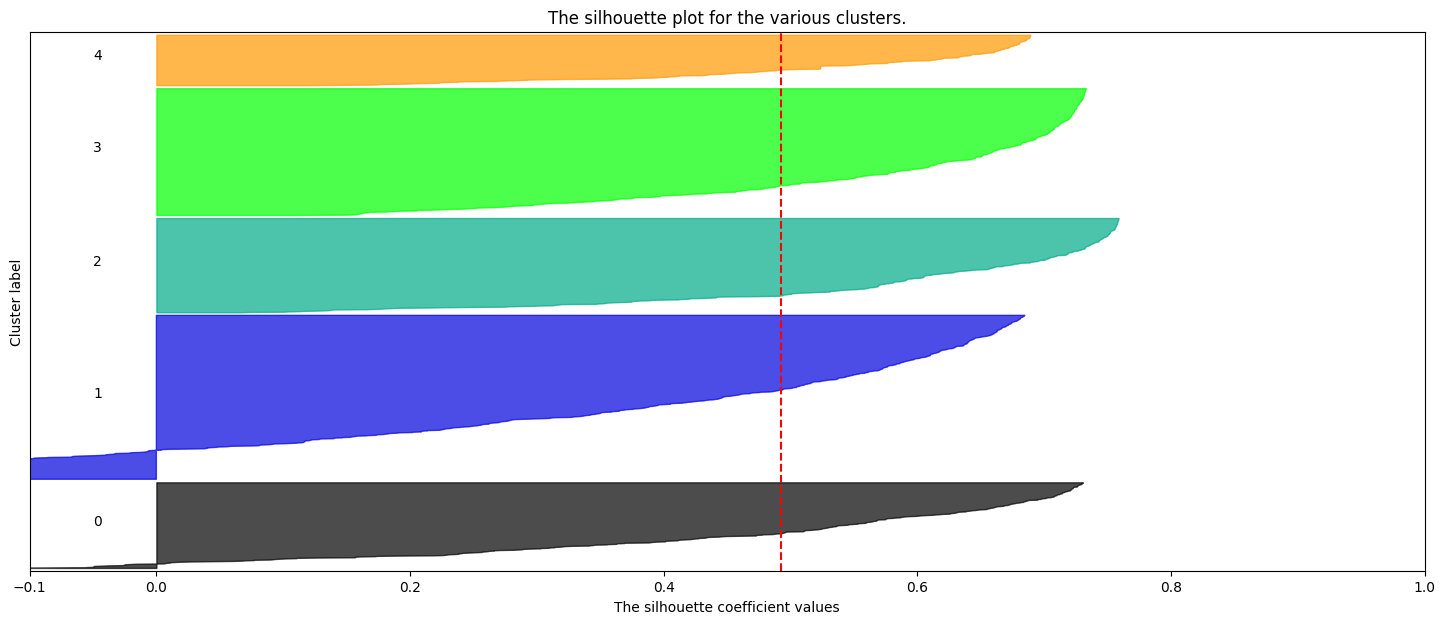

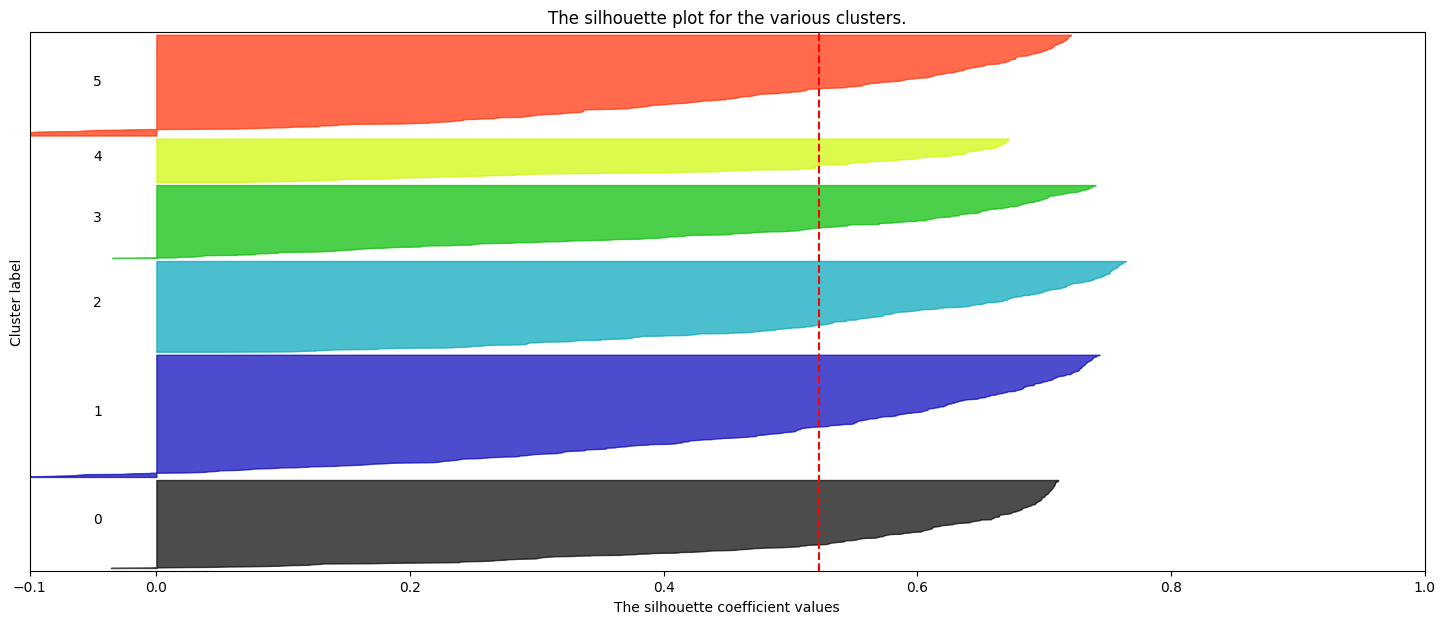

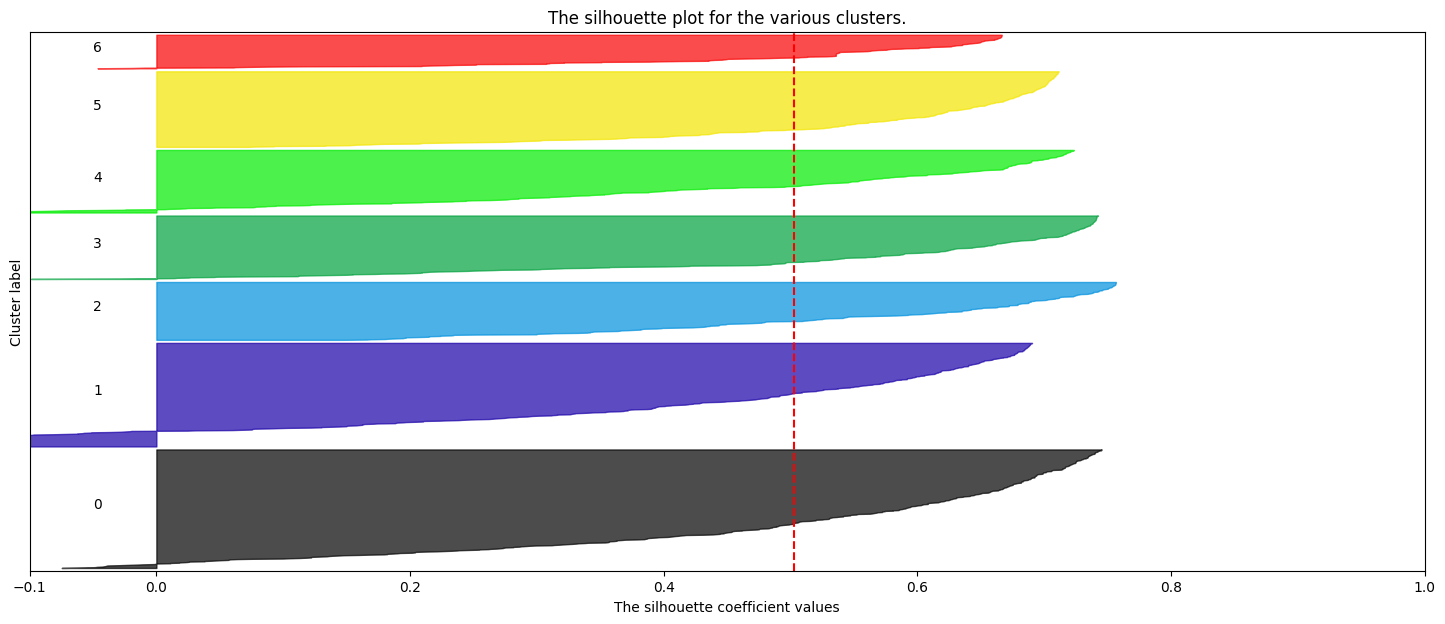

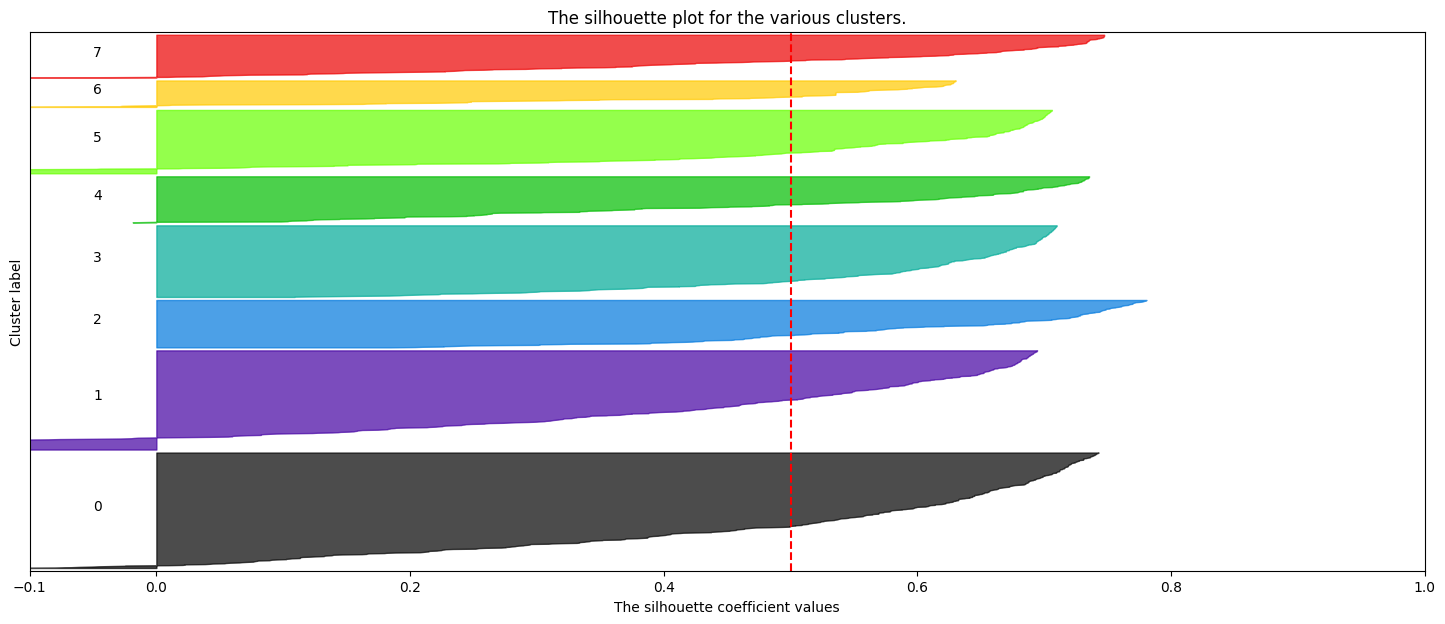

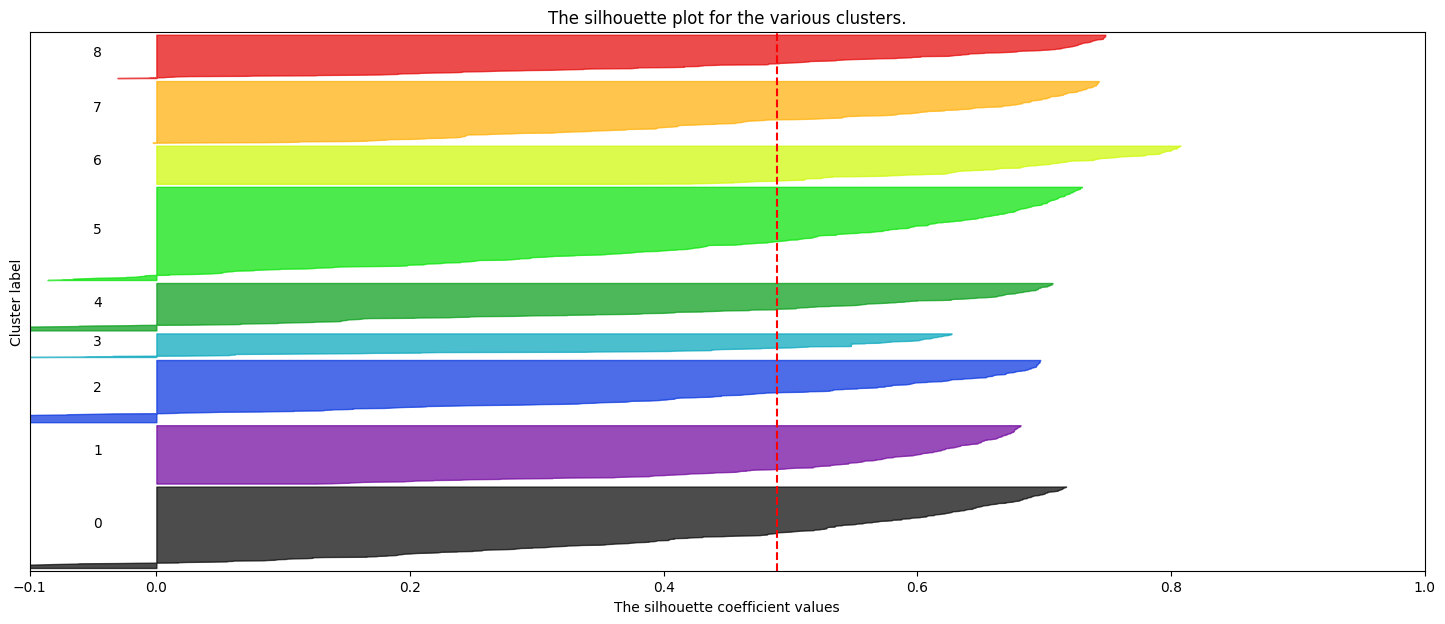

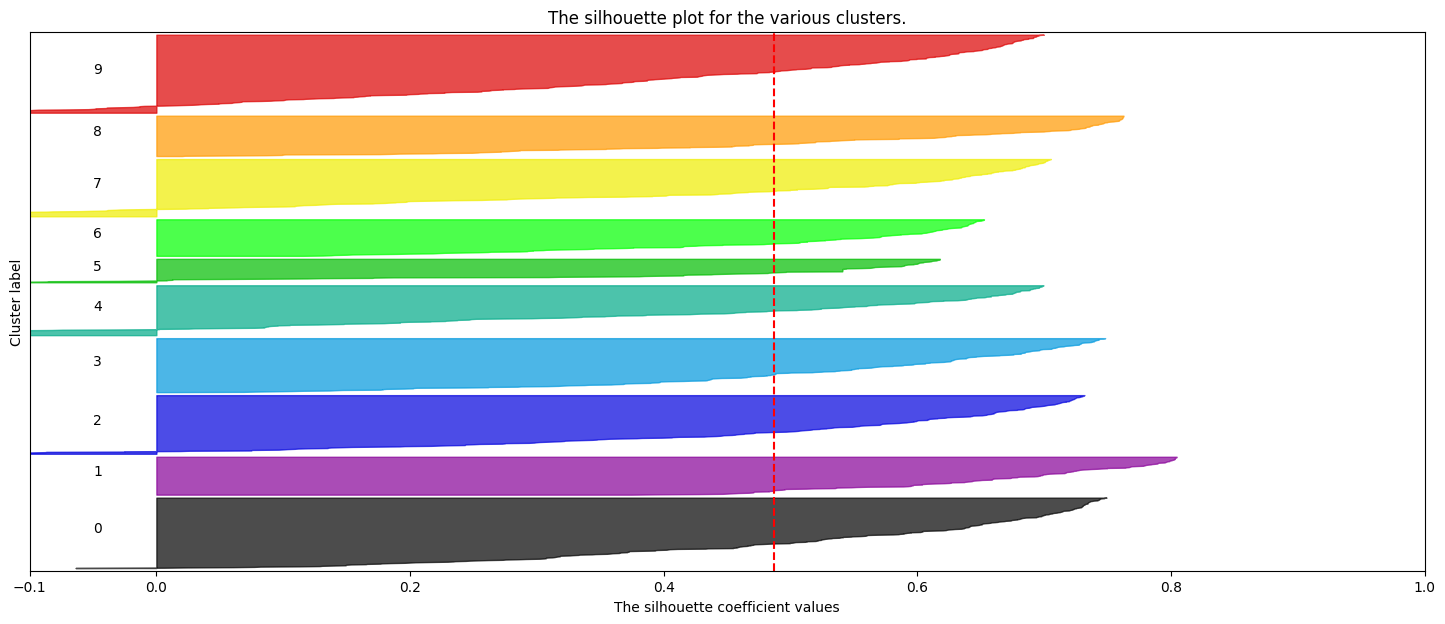

In [500]:
# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.

def evaluate_sp(X, n) : 
    range_n_clusters = [i for i in range(2,n+1)]

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, ax1  = plt.subplots(1, 1)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = SpectralClustering(n_clusters=n_clusters, random_state=10, affinity="nearest_neighbors", eigen_solver= "lobpcg")
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.show()
    
    
evaluate_sp(wo,10)

## 5ème itérations / log scaling

In [508]:
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(np.log)

In [515]:
wo[wo == 0] = 0.001

For n_clusters = 2 The average silhouette_score is : 0.15017317384934117
For n_clusters = 3 The average silhouette_score is : 0.12002045113955054
For n_clusters = 4 The average silhouette_score is : 0.11646851032079558
For n_clusters = 5 The average silhouette_score is : 0.1181277262938041
For n_clusters = 6 The average silhouette_score is : 0.11250118406878827
For n_clusters = 7 The average silhouette_score is : 0.11763879184235938
For n_clusters = 8 The average silhouette_score is : 0.10351230772615579
For n_clusters = 9 The average silhouette_score is : 0.12208460945119037
For n_clusters = 10 The average silhouette_score is : 0.11820137591192403


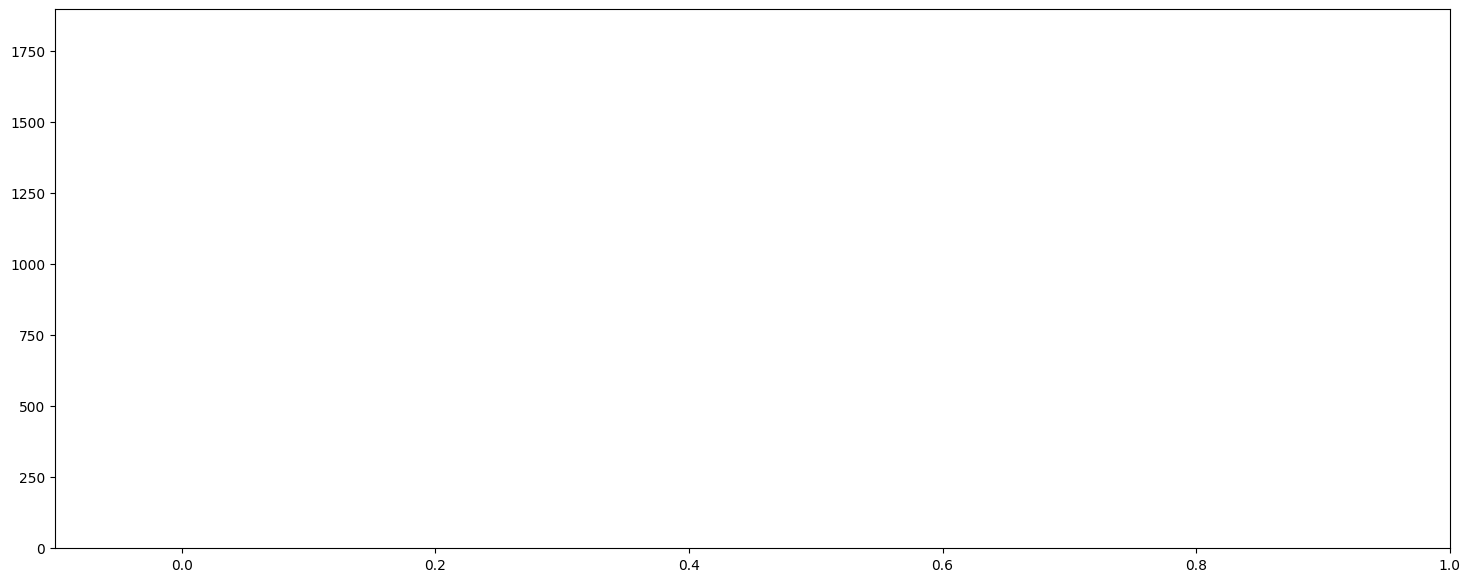

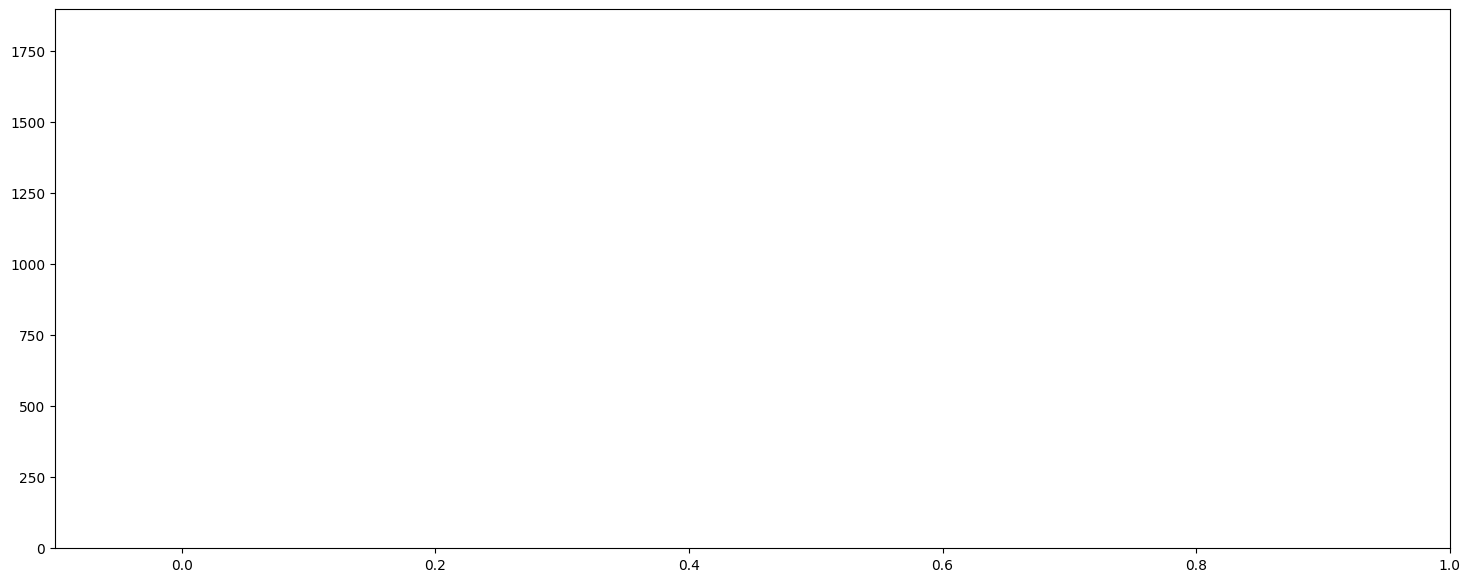

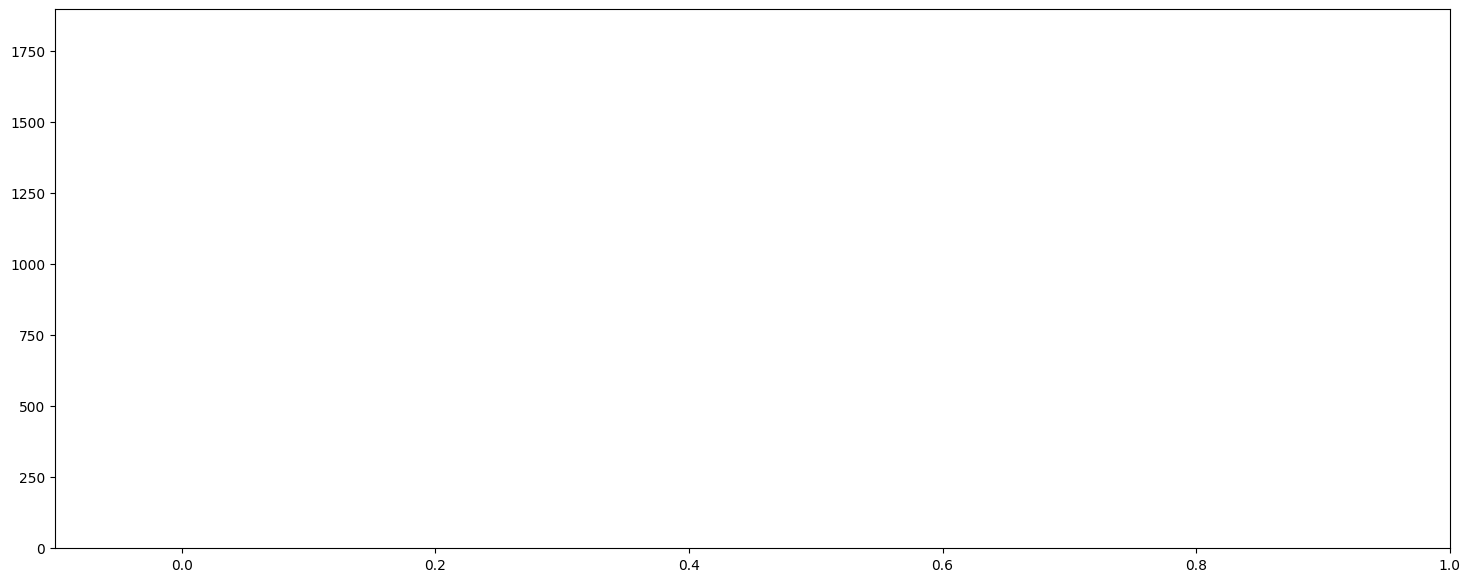

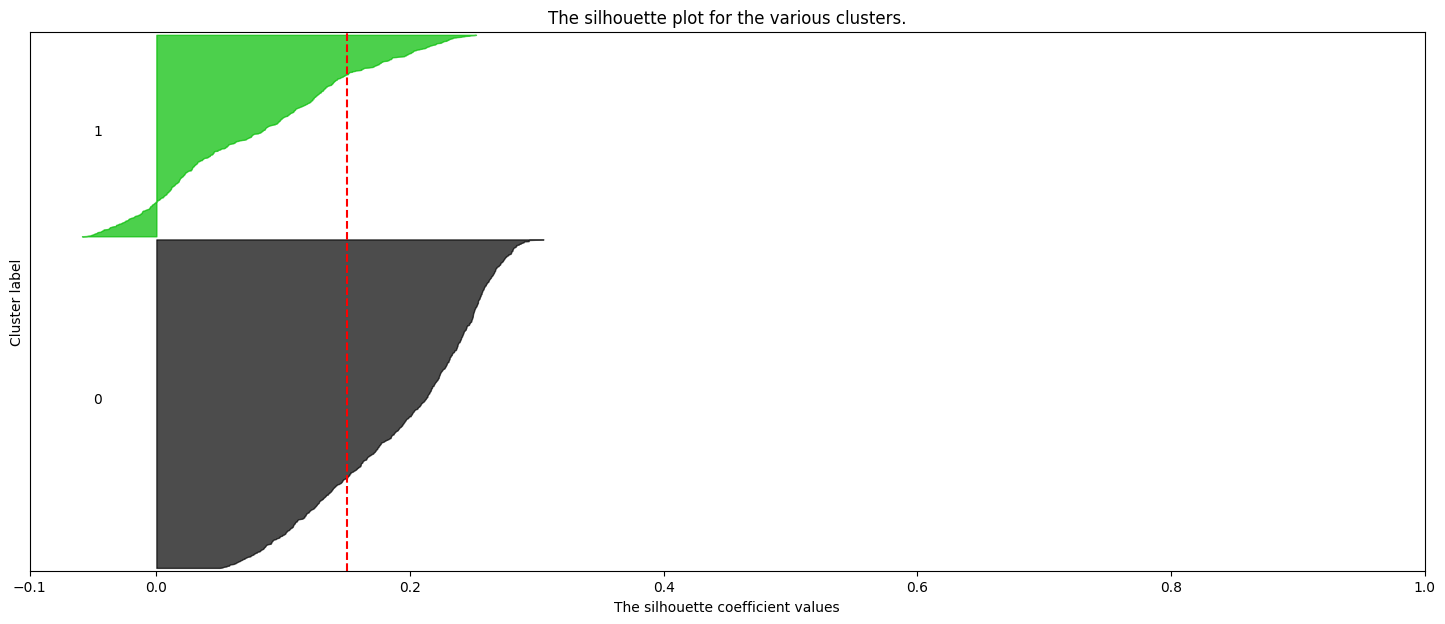

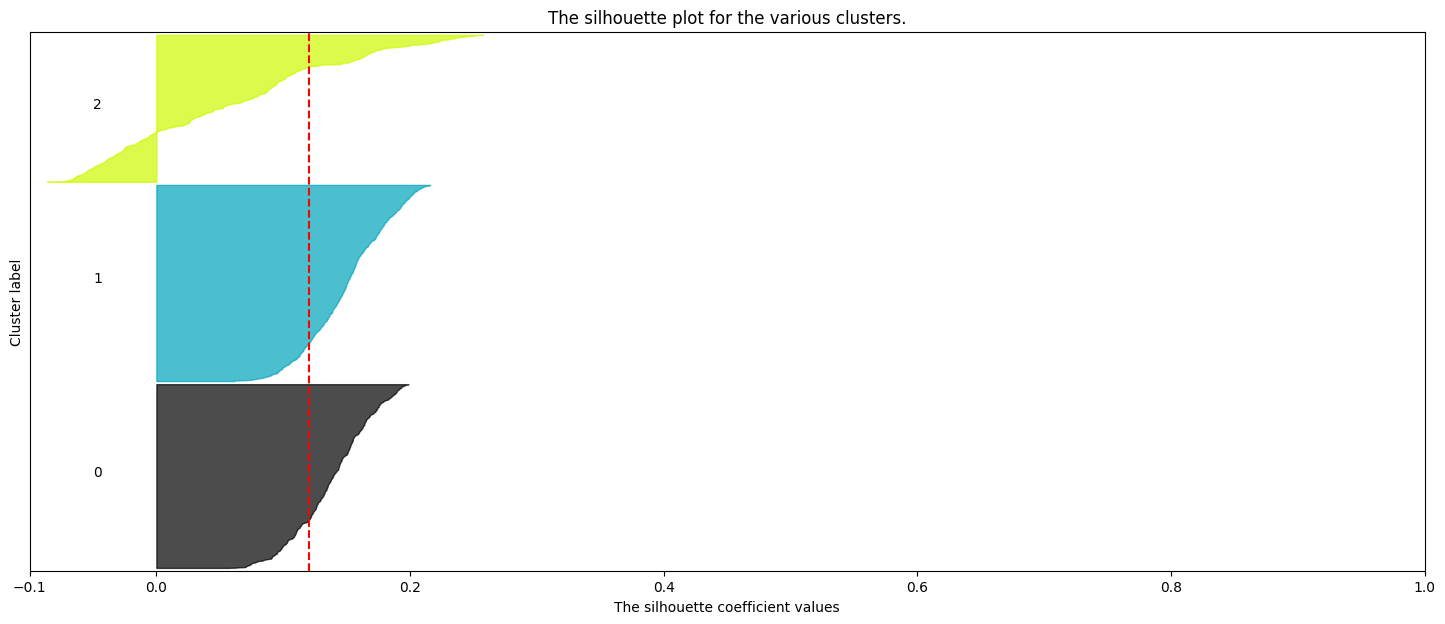

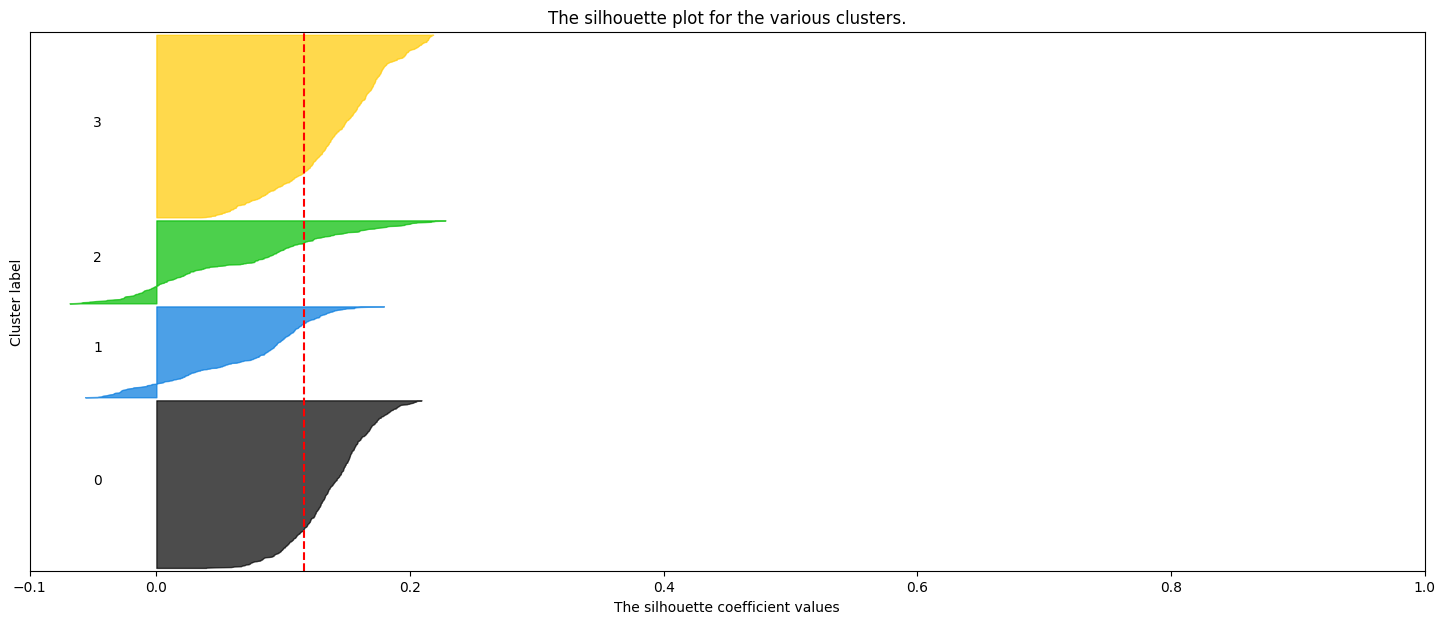

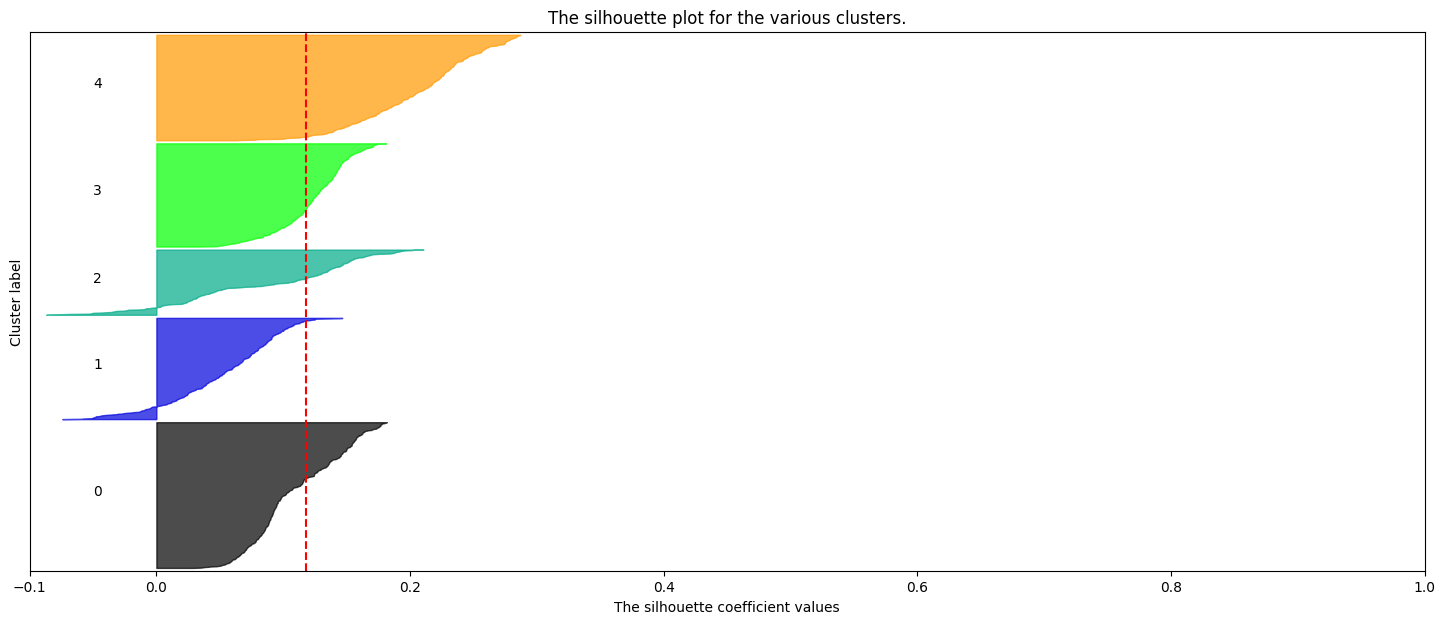

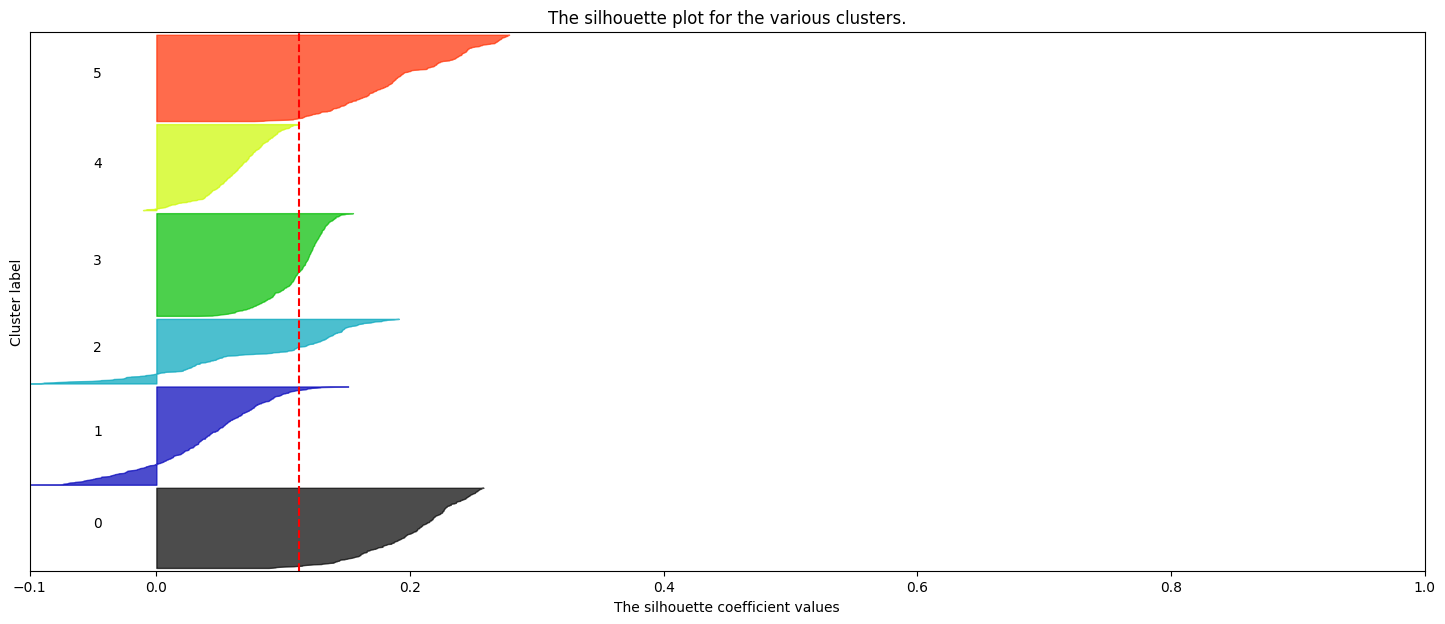

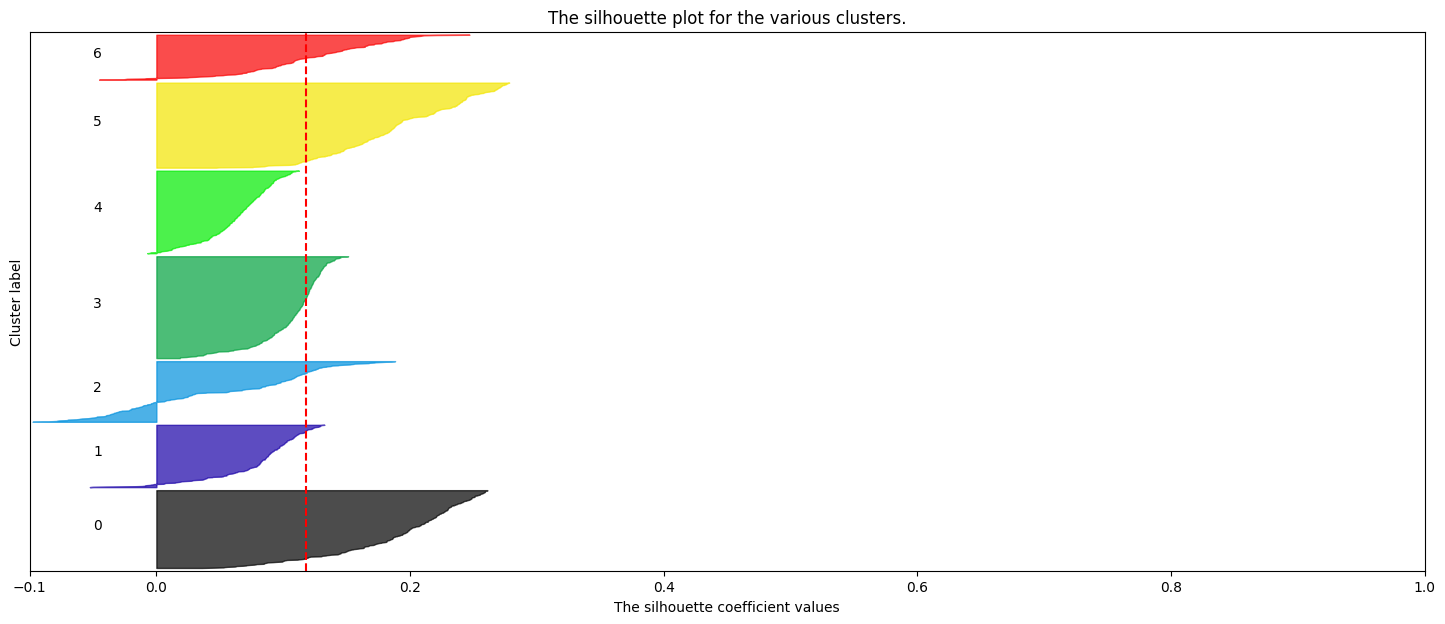

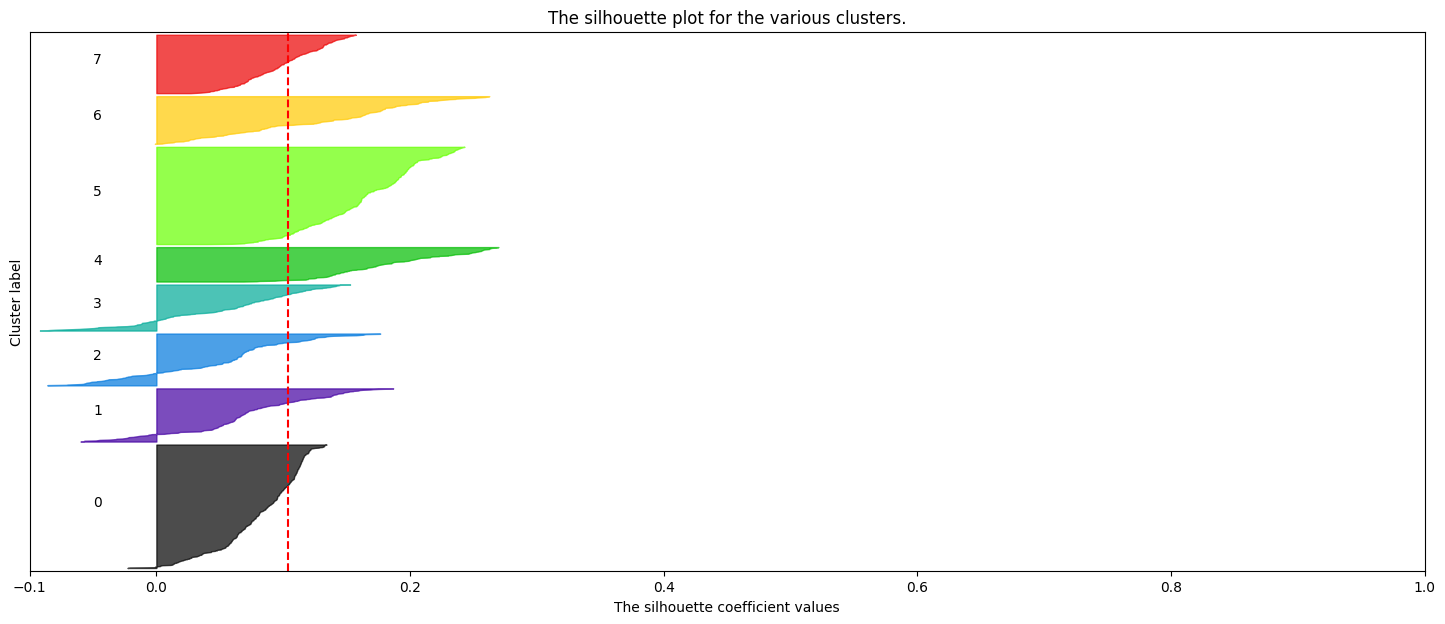

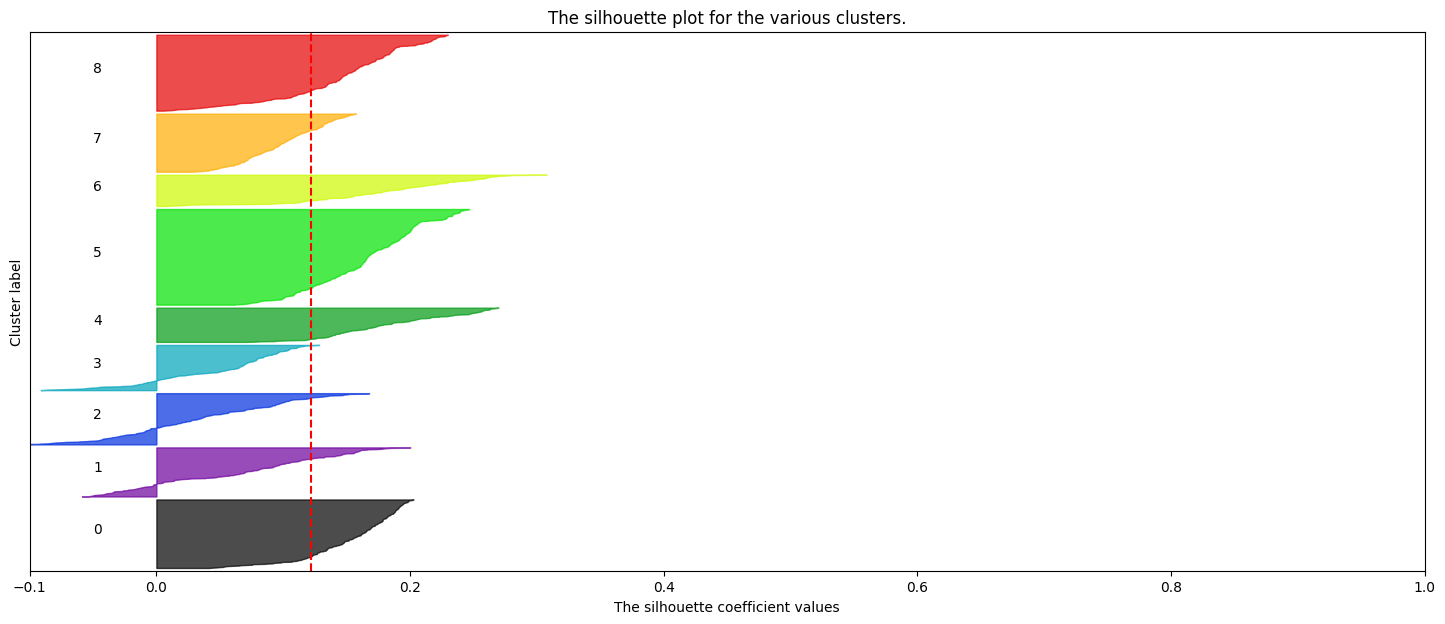

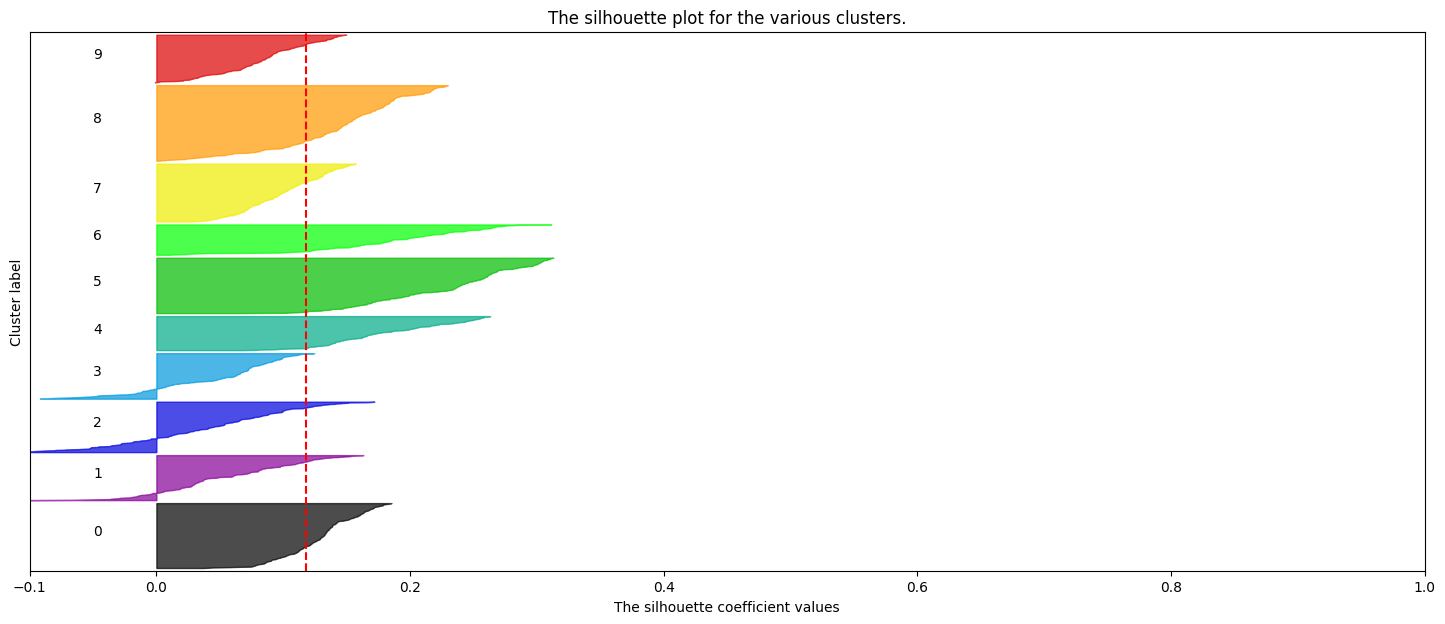

In [518]:
evaluate(transformer.transform(wo),10)

## 6 ème itération / feature selection

In [520]:
from sklearn.decomposition import PCA

pca = PCA(n_components=len(wo.columns))
pca.fit(wo)
print(pca.explained_variance_ratio_)

[9.99519162e-01 3.85445518e-04 7.28493200e-05 1.30956354e-05
 3.66031320e-06 2.01185768e-06 1.96591693e-06 1.43813004e-06
 2.96653388e-07 2.94880823e-08 1.47259382e-08 1.04595528e-08
 6.13996516e-09 4.01941481e-09 3.28816577e-09 1.25945573e-09
 1.12483411e-09 8.17099358e-10 7.94806516e-10 5.64971536e-10
 4.46548872e-10 3.18678787e-10 2.94226500e-10 2.50859267e-10
 1.61547396e-10 1.49502792e-10 1.08075773e-10 8.80892011e-11
 2.86947240e-16 9.97023438e-33 9.97023438e-33 9.97023438e-33
 9.97023438e-33 9.97023438e-33 9.97023438e-33 9.97023438e-33
 9.97023438e-33 9.97023438e-33 9.97023438e-33 9.97023438e-33
 9.97023438e-33 9.97023438e-33]


In [523]:
score_pca = pca.transform(wo)
wcss = []
for i in range(1,21):
    km_pca = KMeans(n_clusters= i, init = "k-means++", random_state = 0)
    km_pca.fit(score_pca)
    wcss.append(km_pca.inertia_)

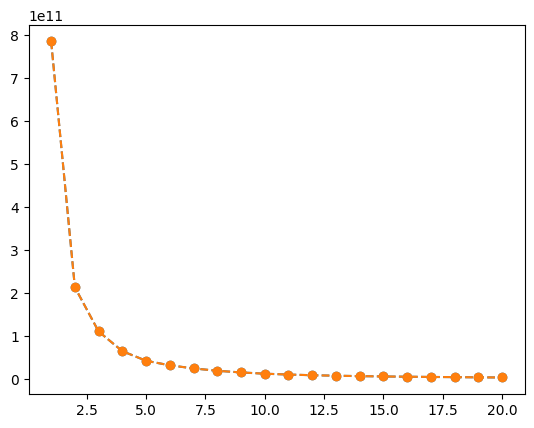

In [525]:
plt.plot(range(1,21), wcss, marker = "o", linestyle ="--")
plt.show()

In [546]:
km_pca = KMeans(n_clusters= 3, init = "k-means++", random_state= 0)
km_pca.fit(score_pca)

KMeans(n_clusters=3, random_state=0)

In [533]:
df_pca = pd.concat([wo.reset_index(drop=True), pd.DataFrame(score_pca)], axis = 1)
df_pca.columns.values[-3:] = ["Component 1", "Component 2", "component 3"]
df_pca["PCA k_means"] = km_pca.labels_

In [534]:
df_pca["Segment"] = df_pca["PCA k_means"].map({0 : "first", 1 : "second", 2 : "third", 3 : "fourth"})

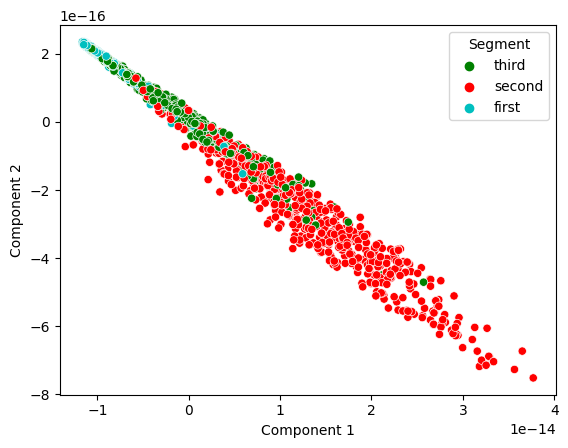

In [536]:
sns.scatterplot(df_pca["Component 1"], df_pca["Component 2"], hue = df_pca["Segment"], palette = ["g","r","c"])
plt.show()

In [548]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(wo)
print(pca.explained_variance_ratio_)

km_pca = KMeans(n_clusters= 3, init = "k-means++", random_state= 0)
km_pca.fit(score_pca)

df_pca = pd.concat([wo.reset_index(drop=True), pd.DataFrame(score_pca)], axis = 1)
df_pca.columns.values[-3:] = ["Component 1", "Component 2", "component 3"]
df_pca["PCA k_means"] = km_pca.labels_

df_pca["Segment"] = df_pca["PCA k_means"].map({0 : "first", 1 : "second", 2 : "third"})



silhouette_score( pd.DataFrame(scores_pca).iloc[:,:3],km_pca.predict( pd.DataFrame(scores_pca).iloc[:,:3]))

[9.99519162e-01 3.85445518e-04 7.28493200e-05]


0.5488386250417283

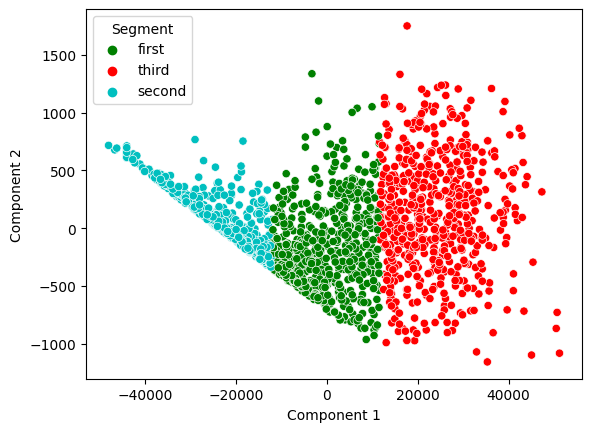

In [549]:
sns.scatterplot(df_pca["Component 1"], df_pca["Component 2"], hue = df_pca["Segment"], palette = ["g","r","c"])
plt.show()

In [550]:
wo

,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,Kidhome_2,Teenhome_0,Teenhome_1,Teenhome_2,AcceptedCmp4_1,AcceptedCmp5_1,AcceptedCmp1_1,AcceptedCmp2_1,Complain_1,Response_1
0,58138.0,4.0,58.0,635.0,88.0,546.0,172.000,88.000,88.0,3.000,...,0.001,1.000,0.001,0.001,0.001,0.001,0.001,0.001,0.001,1.000
1,46344.0,8.0,38.0,11.0,1.0,6.0,2.000,1.000,6.0,2.000,...,0.001,0.001,1.000,0.001,0.001,0.001,0.001,0.001,0.001,0.001
2,71613.0,8.0,26.0,426.0,49.0,127.0,111.000,21.000,42.0,1.000,...,0.001,1.000,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001
3,26646.0,10.0,26.0,11.0,4.0,20.0,10.000,3.000,5.0,2.000,...,0.001,1.000,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001
4,58293.0,1.0,94.0,173.0,43.0,118.0,46.000,27.000,15.0,5.000,...,0.001,1.000,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210,41769.0,2.0,31.0,302.0,29.0,131.0,32.000,0.001,27.0,6.000,...,0.001,1.000,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001
2211,88325.0,5.0,42.0,519.0,71.0,860.0,93.000,27.000,53.0,1.000,...,0.001,0.001,1.000,0.001,0.001,0.001,0.001,0.001,0.001,0.001
2213,80617.0,12.0,42.0,594.0,51.0,631.0,72.000,55.000,32.0,1.000,...,0.001,1.000,0.001,0.001,1.000,0.001,0.001,0.001,0.001,0.001
2214,5305.0,7.0,12.0,12.0,4.0,7.0,1.000,3.000,5.0,0.001,...,0.001,0.001,1.000,0.001,0.001,0.001,0.001,0.001,0.001,0.001


In [542]:
 pd.DataFrame(score_pca).iloc[:,:3]

,0,1,2
0,6700.295448,1039.560276,246.164300
1,-5146.798265,-540.779147,-8.922616
2,20139.571579,-338.954005,-77.227693
3,-24834.914330,82.765427,35.640835
4,6811.304173,-418.703060,26.040027
...,...,...,...
1862,-9701.390339,209.239034,-27.292348
1863,36872.543552,87.901615,444.693838
1864,29161.658801,117.354012,214.475108
1865,-46167.186548,693.701037,48.747632


# Conlusions